#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, Birch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# **Data Preprocessing**
Training Set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CensusCanada2016Training.csv to CensusCanada2016Training.csv


###Data Cleaning

In [ ]:
df_train = pd.read_csv("CensusCanada2016Training.csv",encoding='latin-1') #Reads csv as pandas dataframe
df_train.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,4051,1441,68242.12,1441,323,199,53,182,526,911,525,5,1343,919,424
1,2329,1026,88172.37,1026,927,70,15,3,0,792,230,4,991,778,213
2,5276,2071,103853.38,2071,3,607,567,651,106,1418,652,1,1903,1522,381
3,5967,2203,82796.63,2203,133,1695,248,79,0,1397,806,0,2079,1272,807
4,4236,1419,91648.22,1419,0,7,127,938,143,914,505,0,1348,1186,162


In [ ]:
df_train.describe()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4866.967400,1927.776200,77241.071536,1927.776200,386.510600,555.437800,260.48240,237.92820,138.595600,1134.79180,777.188400,15.796000,1810.954800,1182.21140,628.155800
std,2491.841571,974.811432,33371.567357,974.811432,416.908471,448.327845,257.86717,265.43332,221.809214,812.09222,891.021549,62.949187,897.938845,710.51703,594.295093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3289.750000,1333.750000,53040.835000,1333.750000,47.000000,192.000000,74.00000,58.00000,17.000000,534.00000,146.000000,0.000000,1258.000000,687.00000,201.000000
50%,4655.000000,1825.000000,76206.780000,1825.000000,238.000000,470.000000,181.00000,143.00000,52.000000,1076.00000,487.000000,2.000000,1724.500000,1112.00000,456.000000
75%,6233.750000,2428.250000,95438.495000,2428.250000,613.000000,830.000000,369.00000,325.00000,157.000000,1592.00000,1119.000000,6.000000,2281.250000,1570.00000,879.000000
max,30789.000000,15388.000000,669559.560000,15388.000000,2411.000000,3547.000000,1740.00000,2360.00000,2262.000000,9123.00000,15248.000000,1378.000000,11891.000000,8628.00000,6813.000000


In [ ]:
df_train.shape

(5000, 15)

In [ ]:
#df_train.info()
df = df_train.copy()

In [ ]:
#renaming column names
df.columns = ['Total_population', 'Total_households', 'Median_income', 'THC', 
              'THC_before1961','THC1961_1980','THC1981_1990','THC1991_2000','THC2001_2005',
              'TH_houses','TH_apartment','TH_other_dewelling',
              'TH_tenure','TH_owner','TH_renter']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Total_population    5000 non-null   int64  
 1   Total_households    5000 non-null   int64  
 2   Median_income       5000 non-null   float64
 3   THC                 5000 non-null   int64  
 4   THC_before1961      5000 non-null   int64  
 5   THC1961_1980        5000 non-null   int64  
 6   THC1981_1990        5000 non-null   int64  
 7   THC1991_2000        5000 non-null   int64  
 8   THC2001_2005        5000 non-null   int64  
 9   TH_houses           5000 non-null   int64  
 10  TH_apartment        5000 non-null   int64  
 11  TH_other_dewelling  5000 non-null   int64  
 12  TH_tenure           5000 non-null   int64  
 13  TH_owner            5000 non-null   int64  
 14  TH_renter           5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [ ]:
#create several columns serve for later calculation
df['THC_before1991'] = df['THC_before1961'] + df['THC1961_1980'] + df['THC1981_1990']
df['THC_before2001'] = df['THC_before1991'] + df['THC1991_2000']
df['THC_before2006'] = df['THC_before2001'] + df['THC2001_2005']
df['THC2006_2016'] = df['Total_households'] - df['THC_before2006']

## Derive Input Variables

In [ ]:
# Derive additional columns
# % increase in total household for period of construction
df['%increase_1991_2000'] = df.THC1991_2000 / df.THC_before1991
df['%increase_2001_2005'] = df.THC2001_2005 / df.THC_before2001
df['%increase_2006_2016'] = df.THC2006_2016 / df.THC_before2006

In [ ]:
# % Households by Structure Type
df['%Houses'] = df.TH_houses / df.Total_households
df['%Apartment'] = df.TH_apartment / df.Total_households
df['%Other_dwelling'] = df.TH_other_dewelling / df.Total_households

In [ ]:
# % Households by Tenure
df['%Owner'] = df.TH_owner / df.Total_households
df['%Renter'] = df.TH_renter / df.Total_households

In [ ]:
#Drop unused columns
df2 = df.drop(columns = ['THC','THC_before1961','THC1961_1980','THC1981_1990','THC1991_2000','THC2001_2005',
                          'TH_houses','TH_apartment','TH_other_dewelling','TH_tenure','TH_owner','TH_renter',
                          'THC_before1991','THC_before2001','THC_before2006','THC2006_2016'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total_population     5000 non-null   int64  
 1   Total_households     5000 non-null   int64  
 2   Median_income        5000 non-null   float64
 3   %increase_1991_2000  4974 non-null   float64
 4   %increase_2001_2005  4976 non-null   float64
 5   %increase_2006_2016  4980 non-null   float64
 6   %Houses              4980 non-null   float64
 7   %Apartment           4980 non-null   float64
 8   %Other_dwelling      4980 non-null   float64
 9   %Owner               4980 non-null   float64
 10  %Renter              4980 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 429.8 KB


In [ ]:
#replace null value with 0
df2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
np.where(pd.isnull(df2))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
df2.describe()

,Total_population,Total_households,Median_income,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Apartment,%Other_dwelling,%Owner,%Renter
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4866.967400,1927.776200,77241.071536,1.006967,0.338741,0.536369,0.614939,0.370291,0.010770,0.621289,0.312702
std,2491.841571,974.811432,33371.567357,5.685199,1.763579,4.509404,0.314213,0.315233,0.045710,0.233871,0.222290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3289.750000,1333.750000,53040.835000,0.048759,0.012308,0.040115,0.380533,0.093855,0.000000,0.463135,0.126127
50%,4655.000000,1825.000000,76206.780000,0.121338,0.037623,0.098411,0.700441,0.280047,0.000711,0.678190,0.257368
75%,6233.750000,2428.250000,95438.495000,0.330991,0.115773,0.241978,0.886405,0.604441,0.004329,0.809493,0.465357
max,30789.000000,15388.000000,669559.560000,292.500000,42.142857,173.285714,1.000000,1.000000,1.000000,3.000000,1.046875


In [ ]:
#outlier in %Owner & %Renter has value greater than 1
outlier = df2[(df2['%Owner'] > 1) | (df2['%Renter'] > 1)]
outlier

,Total_population,Total_households,Median_income,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Apartment,%Other_dwelling,%Owner,%Renter
98,3,2,100000.00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.500000,0.500000
288,497,309,21213.77,0.000000,0.000000,0.023179,0.132686,0.851133,0.016181,0.000000,1.029126
776,1206,564,17668.17,0.032015,0.012774,0.016216,0.069149,0.930851,0.000000,0.003546,1.031915
1433,1921,707,97853.00,0.172117,0.013216,0.024638,0.906648,0.086280,0.007072,1.002829,0.012730
1500,179,128,42726.68,0.000000,0.000000,0.007874,0.078125,0.765625,0.156250,0.000000,1.046875
1554,235,133,95922.51,0.741379,0.029703,0.278846,0.075188,0.000000,0.924812,1.022556,0.000000
1867,3,2,125000.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.500000,0.000000
2022,10,3,45000.00,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.333333,0.000000
2127,34,3,54375.00,0.000000,0.000000,0.500000,0.666667,0.000000,0.333333,1.333333,0.333333
3230,5,2,125000.00,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.500000,0.000000


In [ ]:
#drop outlier value
df2.drop(outlier.index, inplace=True)
df2 = df2.reset_index(drop=True)
df2

,Total_population,Total_households,Median_income,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Apartment,%Other_dwelling,%Owner,%Renter
0,4051,1441,68242.12,0.316522,0.694848,0.123149,0.632200,0.364330,0.003470,0.637752,0.294240
1,2329,1026,88172.37,0.002964,0.000000,0.010837,0.771930,0.224172,0.003899,0.758285,0.207602
2,5276,2071,103853.38,0.553101,0.057987,0.070838,0.684693,0.314824,0.000483,0.734911,0.183969
3,5967,2203,82796.63,0.038054,0.000000,0.022274,0.634135,0.365865,0.000000,0.577394,0.366319
4,4236,1419,91648.22,7.000000,0.133396,0.167901,0.644116,0.355884,0.000000,0.835800,0.114165
...,...,...,...,...,...,...,...,...,...,...,...
4981,2588,953,108823.38,14.735294,0.515888,0.175092,0.971668,0.028332,0.000000,0.888772,0.029381
4982,9036,3859,68735.64,0.175122,0.185969,0.350718,0.618813,0.372117,0.009070,0.674268,0.271314
4983,4689,1895,71370.58,0.450862,0.017231,0.106893,0.357256,0.547757,0.094987,0.643272,0.287599
4984,3673,1038,58258.26,0.123537,0.015046,0.183580,0.766859,0.233141,0.000000,0.526012,0.334297


In [ ]:
df2.describe()

,Total_population,Total_households,Median_income,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Apartment,%Other_dwelling,%Owner,%Renter
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,4879.522663,1932.713398,77242.570933,1.009300,0.339476,0.537493,0.614727,0.370776,0.010486,0.619874,0.312579
std,2483.821230,971.627854,33368.749963,5.692981,1.765947,4.515658,0.313937,0.315017,0.043586,0.227888,0.221289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3301.250000,1340.000000,53048.870000,0.048861,0.012401,0.040324,0.380631,0.094697,0.000000,0.463372,0.126833
50%,4663.000000,1825.500000,76191.270000,0.121674,0.037798,0.098747,0.700193,0.280819,0.000719,0.677782,0.257400
75%,6239.000000,2430.500000,95350.202500,0.331140,0.116125,0.242171,0.885444,0.604447,0.004299,0.808926,0.465023
max,30789.000000,15388.000000,669559.560000,292.500000,42.142857,173.285714,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation analysis

In [ ]:
#correlation matrix
input = df2.drop(columns ='Median_income')
corr_matrix = input.corr()
corr_matrix

,Total_population,Total_households,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Apartment,%Other_dwelling,%Owner,%Renter
Total_population,1.000000,0.897491,0.085362,0.196435,0.181313,0.098937,-0.058315,-0.110849,0.184594,-0.138357
Total_households,0.897491,1.000000,0.011602,0.080899,0.123005,-0.165148,0.204484,-0.105299,-0.057325,0.118539
%increase_1991_2000,0.085362,0.011602,1.000000,0.133808,0.007744,0.121867,-0.115415,-0.027296,0.133960,-0.143979
%increase_2001_2005,0.196435,0.080899,0.133808,1.000000,0.090601,0.136996,-0.131371,-0.019563,0.133700,-0.149257
%increase_2006_2016,0.181313,0.123005,0.007744,0.090601,1.000000,0.052698,-0.050638,-0.002628,0.030974,-0.061940
%Houses,0.098937,-0.165148,0.121867,0.136996,0.052698,1.000000,-0.970624,-0.007295,0.839238,-0.844216
%Apartment,-0.058315,0.204484,-0.115415,-0.131371,-0.050638,-0.970624,1.000000,-0.128025,-0.809191,0.869856
%Other_dwelling,-0.110849,-0.105299,-0.027296,-0.019563,-0.002628,-0.007295,-0.128025,1.000000,0.054007,-0.076205
%Owner,0.184594,-0.057325,0.133960,0.133700,0.030974,0.839238,-0.809191,0.054007,1.000000,-0.909044
%Renter,-0.138357,0.118539,-0.143979,-0.149257,-0.061940,-0.844216,0.869856,-0.076205,-0.909044,1.000000


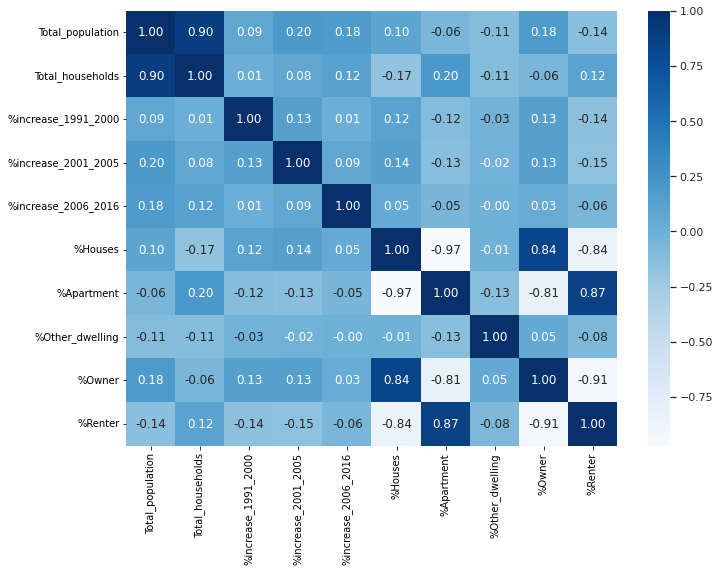

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
sn.set(font_scale=1)
sn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues") #Blues, flare, crest, vlag, 
plt.show()

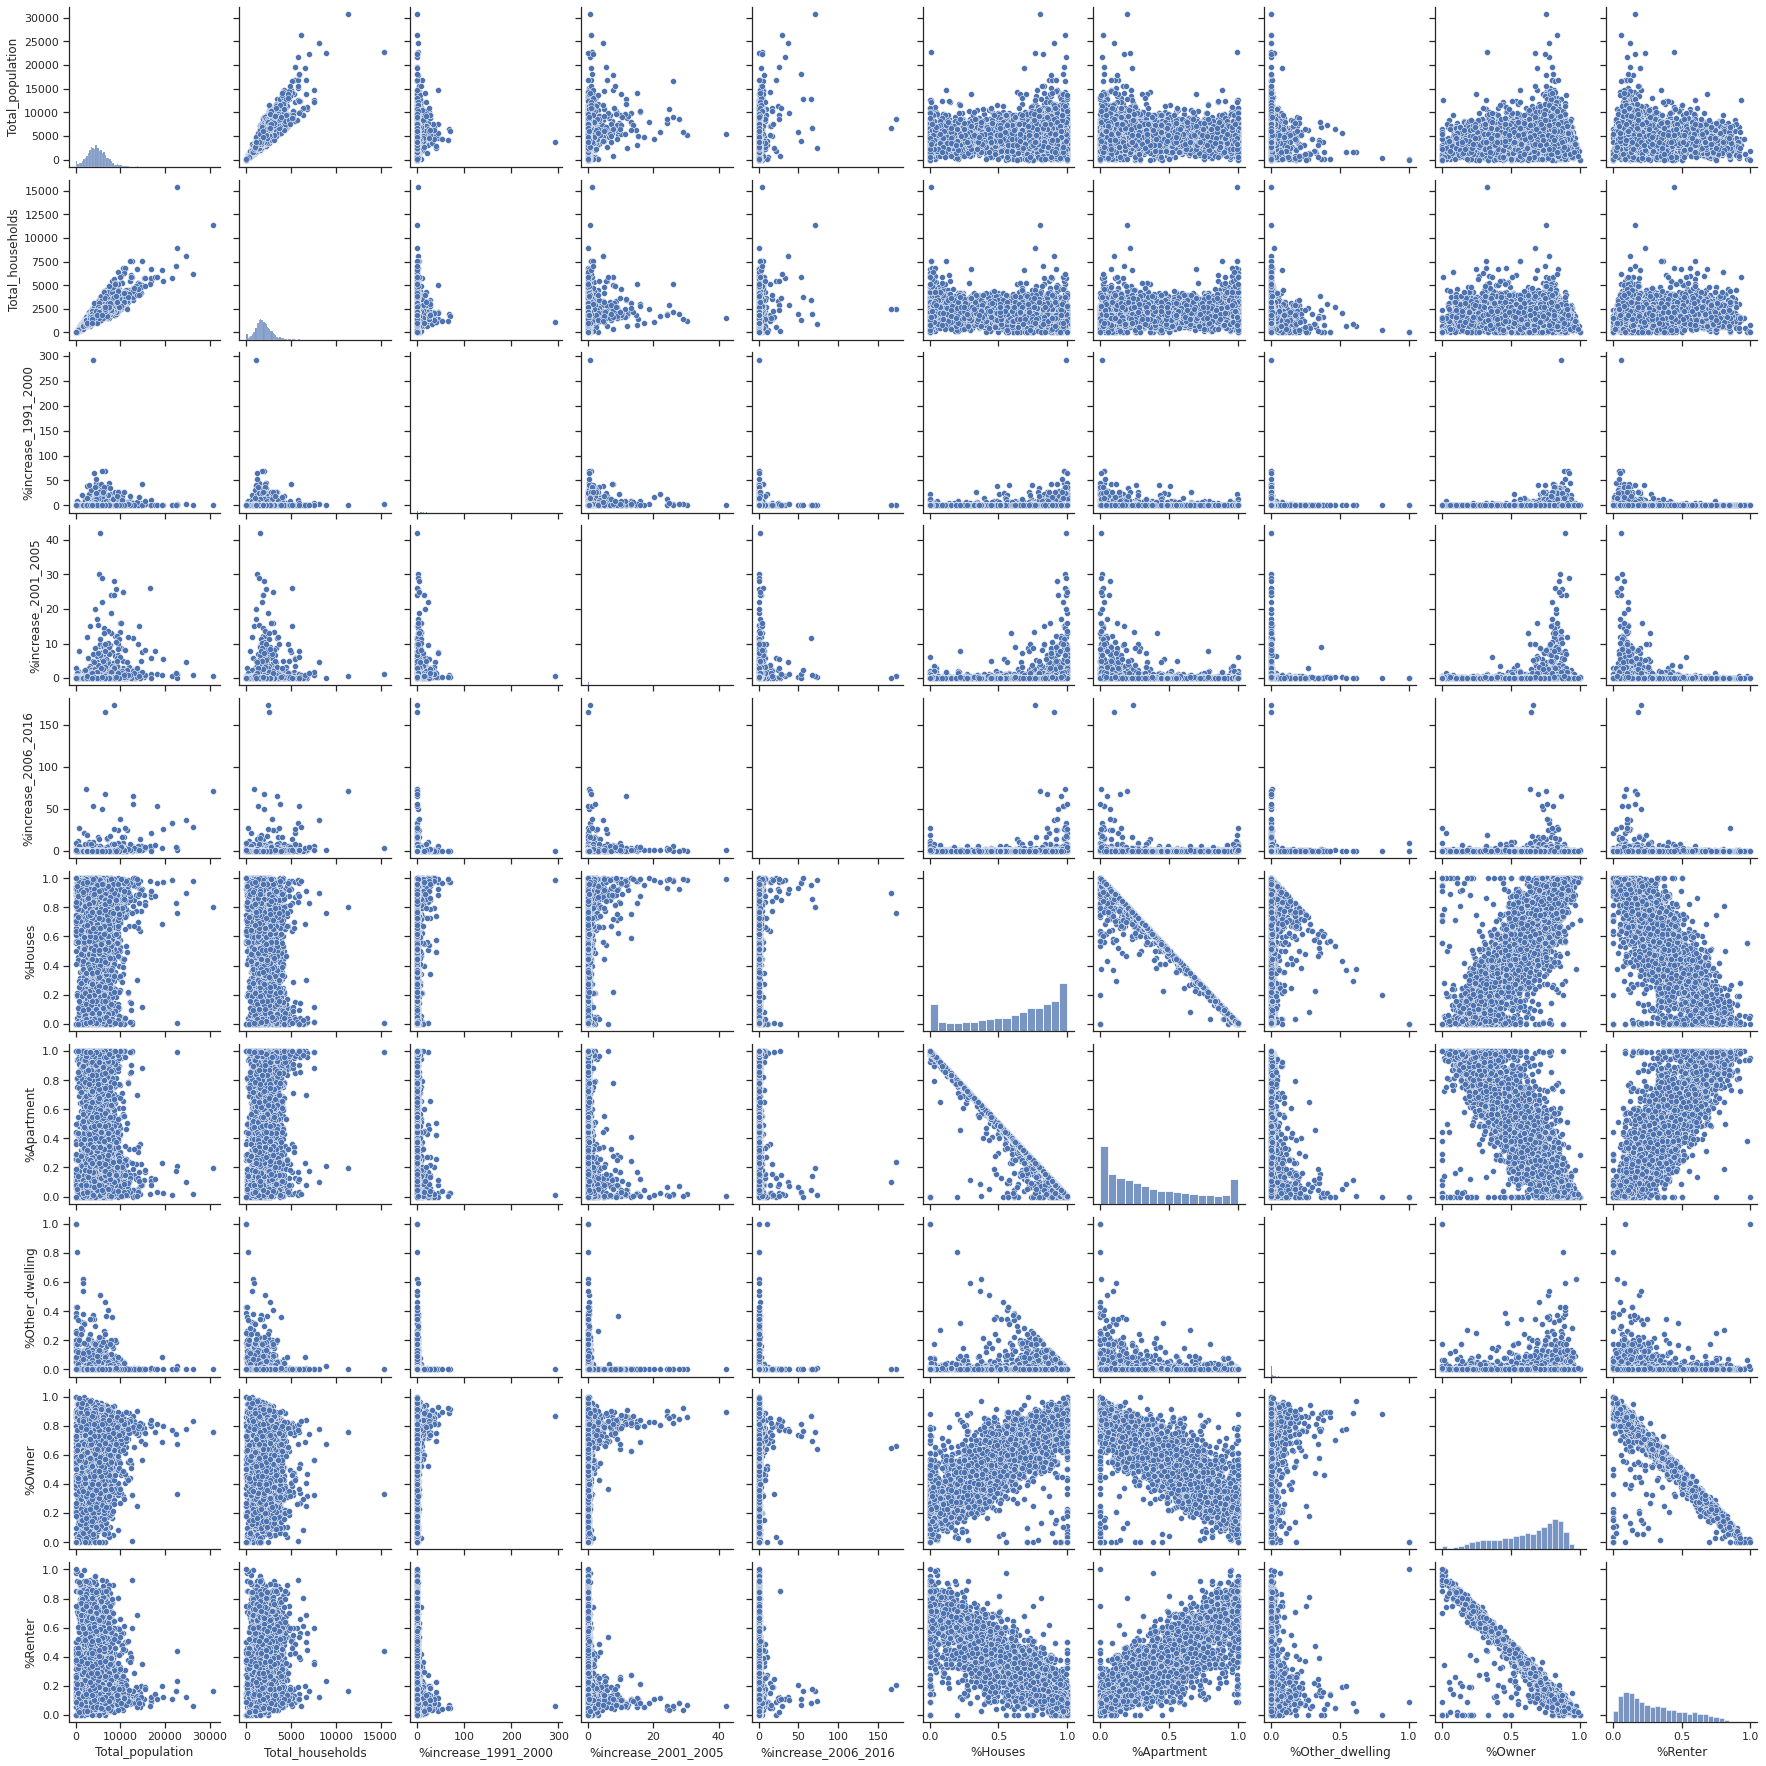

In [ ]:
sn.set_style("ticks")
sn.pairplot(input)

Text(0.5, 1.0, 'Total population vs. Total households')

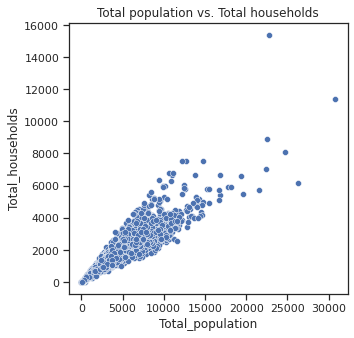

In [ ]:
#Total population vs Total households
fig, ax = plt.subplots(figsize=(5,5))
sc = sn.scatterplot(x="Total_population", y="Total_households", data=df2)
sc.set_title("Total population vs. Total households")

Text(0.5, 1.0, '%Owner vs %Renter ')

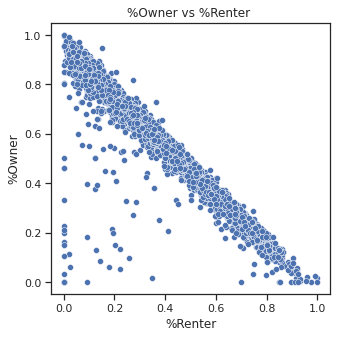

In [ ]:
#"%Renter vs. %Owner"
fig, ax = plt.subplots(figsize=(5,5))
sc = sn.scatterplot(x="%Renter", y="%Owner", data=df2)
sc.set_title("%Owner vs %Renter ")

Text(0.5, 1.0, '%Houses vs. %Apartment')

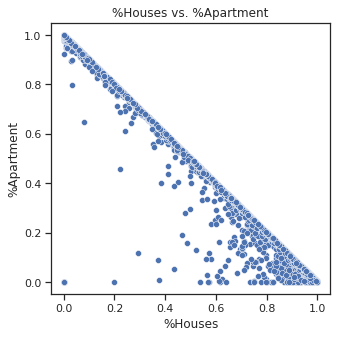

In [ ]:
#"%Houses vs. %Apartment"
fig, ax = plt.subplots(figsize=(5,5))
sc = sn.scatterplot(x="%Houses", y="%Apartment", data=df2)
sc.set_title("%Houses vs. %Apartment")

In [ ]:
#drop highly correlated variables
df3 = df2.drop(columns = ['Total_population','%Apartment','%Other_dwelling', '%Renter'])
input = df3.drop(columns ='Median_income')

In [ ]:
input.corr()

,Total_households,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Owner
Total_households,1.000000,0.011602,0.080899,0.123005,-0.165148,-0.057325
%increase_1991_2000,0.011602,1.000000,0.133808,0.007744,0.121867,0.133960
%increase_2001_2005,0.080899,0.133808,1.000000,0.090601,0.136996,0.133700
%increase_2006_2016,0.123005,0.007744,0.090601,1.000000,0.052698,0.030974
%Houses,-0.165148,0.121867,0.136996,0.052698,1.000000,0.839238
%Owner,-0.057325,0.133960,0.133700,0.030974,0.839238,1.000000


#**Clustering Model**

## Silhouette analysis

In [ ]:
#target variable
y = df3.loc[:,'Median_income']

In [ ]:
#scale the dataset use Min-Max Scaler
scaler = preprocessing.MinMaxScaler()
X = input
X = scaler.fit_transform(X)

([<matplotlib.axis.XTick at 0x7f9b5e51cb80>,
 <a list of 6 Text major ticklabel objects>)

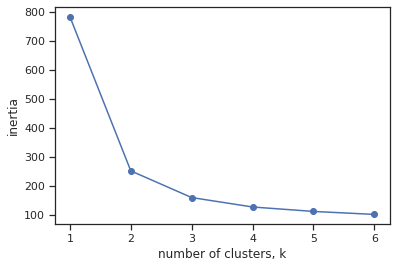

In [ ]:
#Elbow Method:
ks = range(1,7)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid(False)
plt.xticks(ks)

For n_clusters = 2 The average silhouette_score is : 0.579666812016862
For n_clusters = 3 The average silhouette_score is : 0.4743844842554938
For n_clusters = 4 The average silhouette_score is : 0.3985041669308286
For n_clusters = 5 The average silhouette_score is : 0.3405741695062871
For n_clusters = 6 The average silhouette_score is : 0.348007451295237
For n_clusters = 7 The average silhouette_score is : 0.34284637763106146
For n_clusters = 8 The average silhouette_score is : 0.30124876767345315


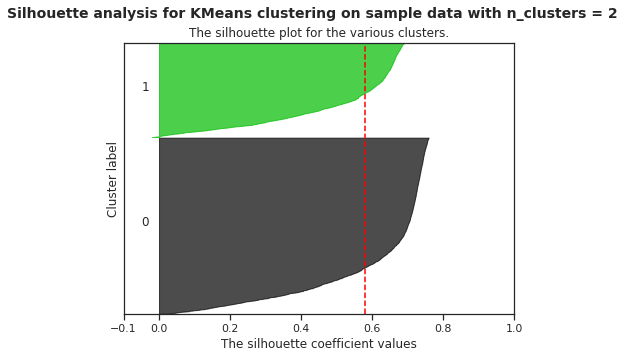

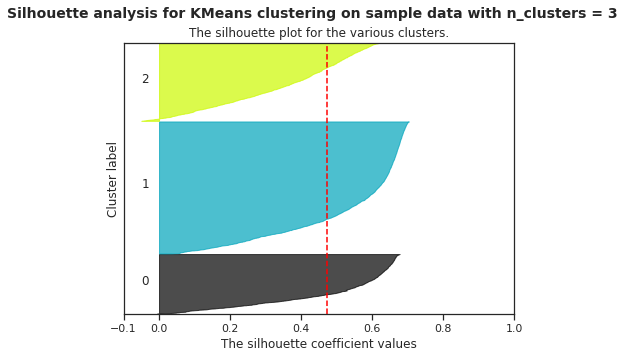

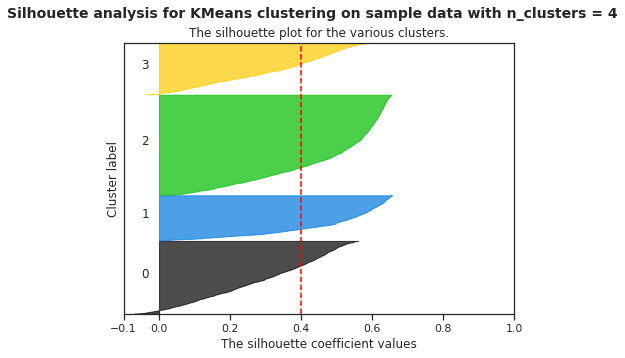

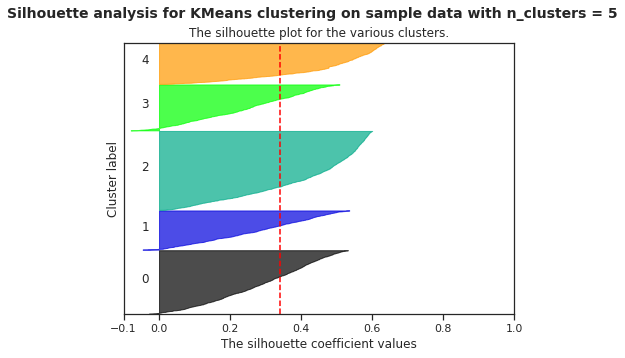

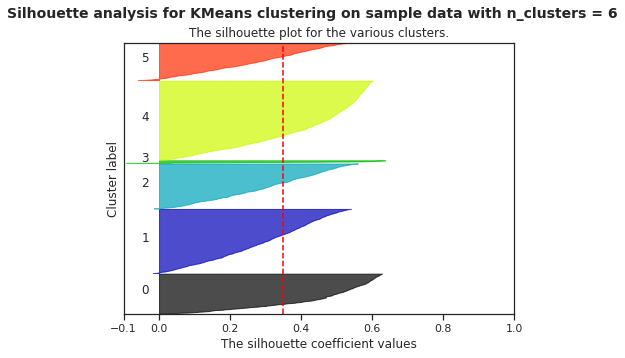

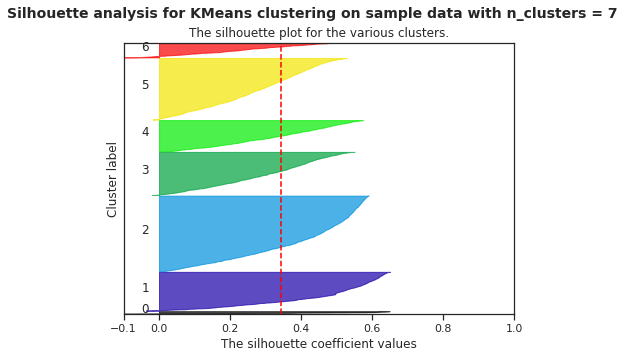

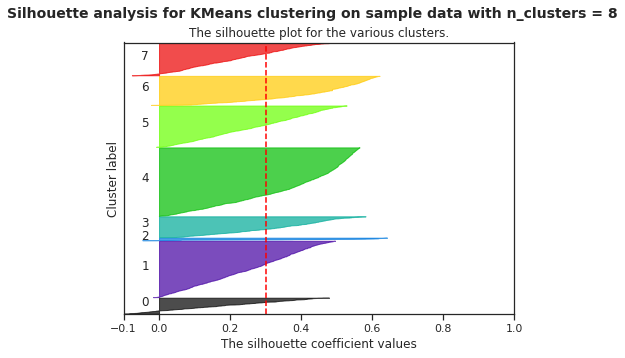

In [ ]:
#silhouette analysis
range_n_clusters = range(2,9)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 11 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=11)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means clustering model

In [ ]:
#select k=3
kmeans = KMeans(n_clusters=3, random_state=5)
pipeline = make_pipeline(kmeans)
pipeline.fit(X)
labels = pipeline.predict(X)
kmeans_cluster = pd.DataFrame(data=labels)

In [ ]:
#add columns for kmeans cluster
df4 = df3.copy()
df4['kmeans_cluster'] = kmeans_cluster[0]
#rename the cluster to 1, 2, 3
df4.replace({'kmeans_cluster':{0: 1, 1: 2, 2:3}}, inplace=True)
df4['kmeans_cluster'].value_counts()

2    2440
3    1441
1    1105
Name: kmeans_cluster, dtype: int64

In [ ]:
pd.Series.sort_index(df4['kmeans_cluster'].value_counts())

1    1105
2    2440
3    1441
Name: kmeans_cluster, dtype: int64

## Clusters Profile

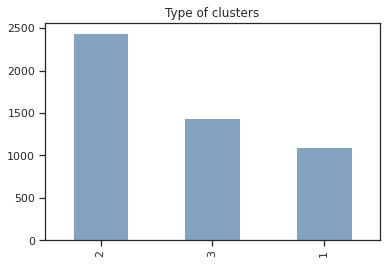

In [ ]:
#Exploring Cluster
df4['kmeans_cluster'].value_counts().plot(kind='bar', title= "Type of clusters", color=(0.2, 0.4, 0.6, 0.6))

In [ ]:
#aggregate statistics by cluster
df_cluster_summary = df4.groupby('kmeans_cluster').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})
# mean value for each cluster
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "mean"]
df_cluster_summary = df_cluster_summary.set_index('column')
df_cluster_summary

kmeans_cluster,metric,1,2,3
column,,,,
Total_households,mean,2149.384615,1816.649590,1963.090909
Median_income,mean,47132.269683,95927.755324,68692.975489
%increase_1991_2000,mean,0.232864,1.699553,0.435911
%increase_2001_2005,mean,0.085467,0.580054,0.126896
%increase_2006_2016,mean,0.301417,0.816493,0.246100
%Houses,mean,0.130944,0.873826,0.546979
%Owner,mean,0.300857,0.798053,0.562803


In [ ]:
# join into single summary dataset
df_profile_overall = df4.describe().T
df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index
df_profile

,metric,1,2,3,count,mean,std,min,25%,50%,75%,max
column,,,,,,,,,,,,
Total_households,mean,2149.384615,1816.649590,1963.090909,4986.0,1932.713398,971.627854,0.0,1340.000000,1825.500000,2430.500000,15388.000000
Median_income,mean,47132.269683,95927.755324,68692.975489,4986.0,77242.570933,33368.749963,0.0,53048.870000,76191.270000,95350.202500,669559.560000
%increase_1991_2000,mean,0.232864,1.699553,0.435911,4986.0,1.009300,5.692981,0.0,0.048861,0.121674,0.331140,292.500000
%increase_2001_2005,mean,0.085467,0.580054,0.126896,4986.0,0.339476,1.765947,0.0,0.012401,0.037798,0.116125,42.142857
%increase_2006_2016,mean,0.301417,0.816493,0.246100,4986.0,0.537493,4.515658,0.0,0.040324,0.098747,0.242171,173.285714
%Houses,mean,0.130944,0.873826,0.546979,4986.0,0.614727,0.313937,0.0,0.380631,0.700193,0.885444,1.000000
%Owner,mean,0.300857,0.798053,0.562803,4986.0,0.619874,0.227888,0.0,0.463372,0.677782,0.808926,1.000000


Text(0.5, 1.0, '% of Houses of total households by Cluster')

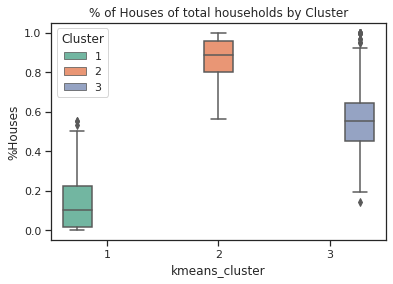

In [ ]:
# %House by cluster
sn.boxplot(x="kmeans_cluster", y="%Houses", data=df4, palette='Set2', hue="kmeans_cluster")
plt.legend(loc='upper left', title='Cluster')
plt.title("% of Houses of total households by Cluster")

Text(0.5, 1.0, '% of Owner of total households by Cluster')

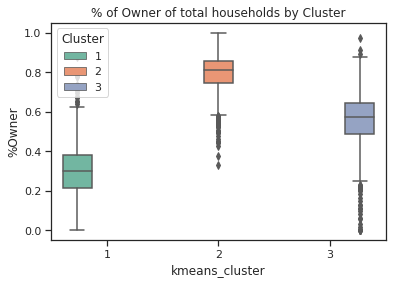

In [ ]:
# %Owner by cluster
sn.boxplot(x="kmeans_cluster", y="%Owner", data=df4, palette='Set2', hue="kmeans_cluster") #, color='skyblue', palette='hls', Set2, Blues, Paired 
plt.legend(loc='upper left', title='Cluster')
plt.title("% of Owner of total households by Cluster")

In [ ]:
Cluster_1 = df4[df4['kmeans_cluster'] == 1]
Cluster_2 = df4[df4['kmeans_cluster'] == 2]
Cluster_3 = df4[df4['kmeans_cluster'] == 3]

(0.0, 200000.0)

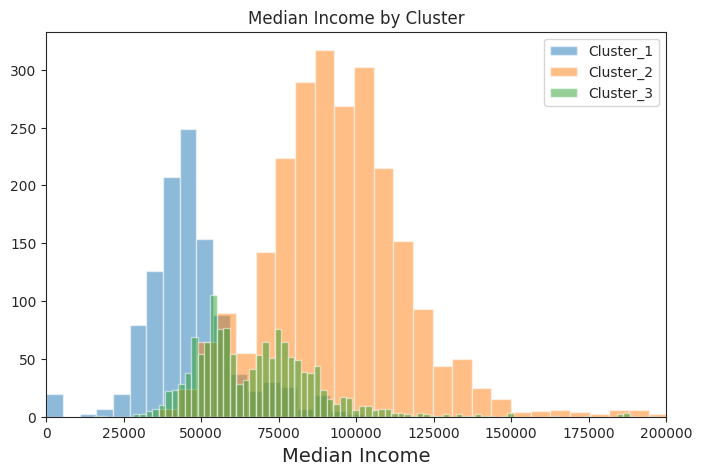

In [ ]:
plt.style.use('default')
sn.set_style("ticks")
#Median Income by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1['Median_income'], bins=100, alpha=0.5, label="Cluster_1")
plt.hist(Cluster_2['Median_income'], bins=100, alpha=0.5, label="Cluster_2")
plt.hist(Cluster_3['Median_income'], bins=100, alpha=0.5, label="Cluster_3")
plt.xlabel("Median Income", size=14)
plt.title("Median Income by Cluster")
plt.legend(loc='upper right')
plt.xlim([0, 200000])


(0.0, 7000.0)

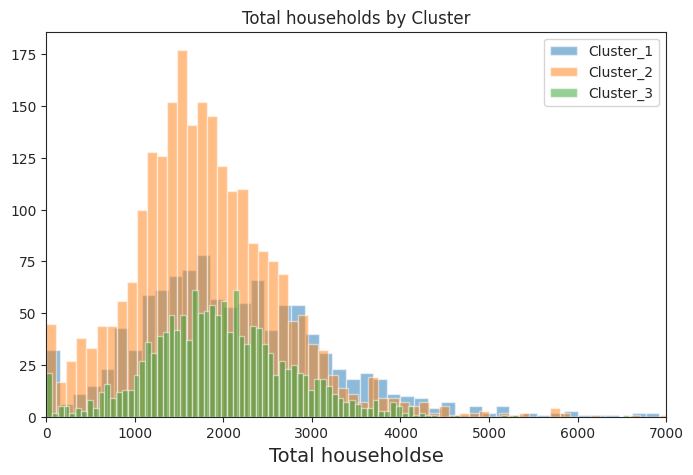

In [ ]:
#Total Households by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1['Total_households'], bins=100, alpha=0.5, label="Cluster_1")
plt.hist(Cluster_2['Total_households'], bins=100, alpha=0.5, label="Cluster_2")
plt.hist(Cluster_3['Total_households'], bins=100, alpha=0.5, label="Cluster_3")
plt.xlabel("Total householdse", size=14)
plt.title("Total households by Cluster")
plt.legend(loc='upper right')
plt.xlim([0, 7000])

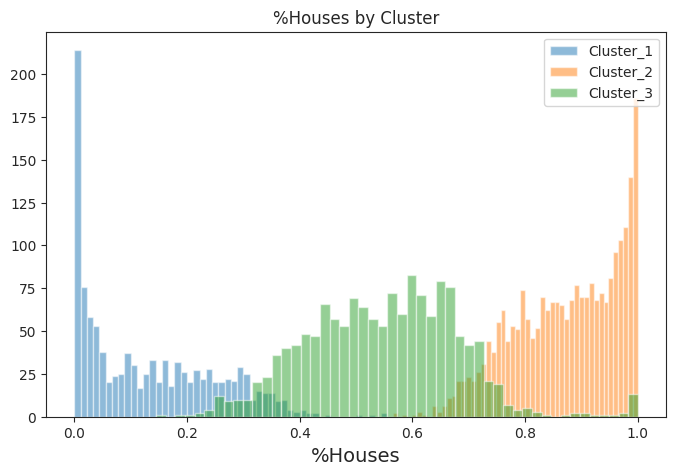

In [ ]:
#%Houses by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1['%Houses'], bins=50, alpha=0.5, label="Cluster_1")
plt.hist(Cluster_2['%Houses'], bins=50, alpha=0.5, label="Cluster_2")
plt.hist(Cluster_3['%Houses'], bins=50, alpha=0.5, label="Cluster_3")
plt.xlabel("%Houses", size=14)
plt.title("%Houses by Cluster")
plt.legend(loc='upper right')

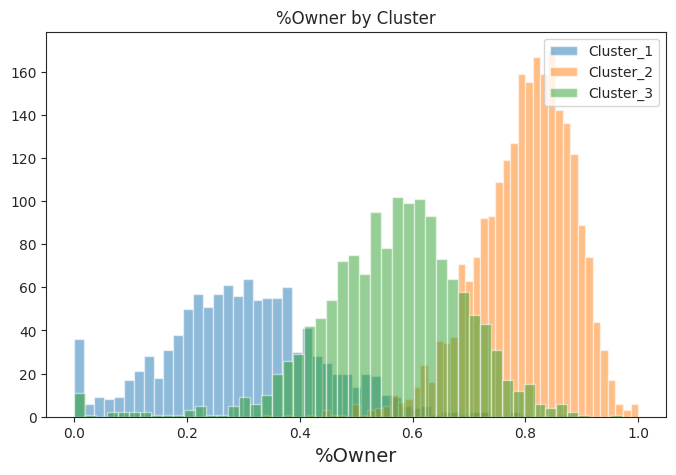

In [ ]:
#%Owner by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1['%Owner'], bins=50, alpha=0.5, label="Cluster_1")
plt.hist(Cluster_2['%Owner'], bins=50, alpha=0.5, label="Cluster_2")
plt.hist(Cluster_3['%Owner'], bins=50, alpha=0.5, label="Cluster_3")
plt.xlabel("%Owner", size=14)
plt.title("%Owner by Cluster")
plt.legend(loc='upper right')

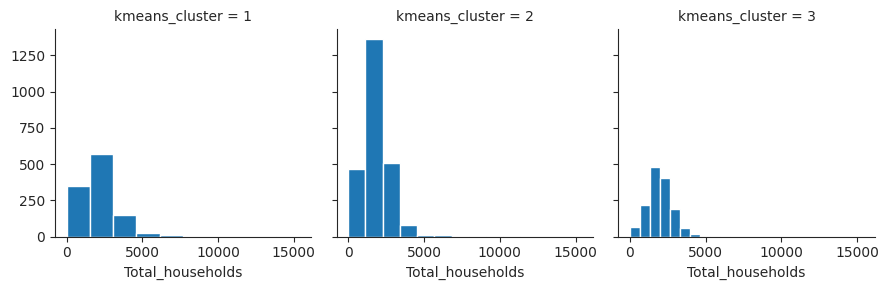

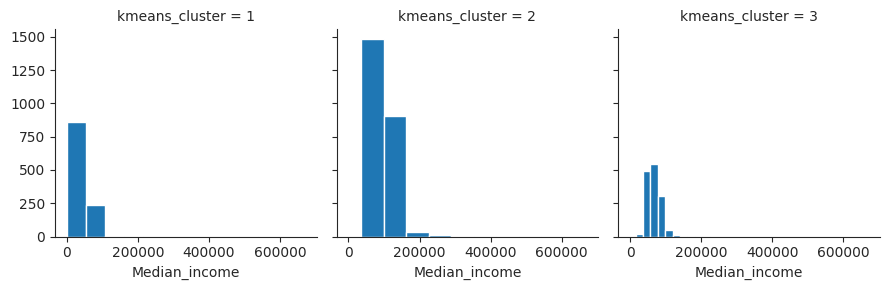

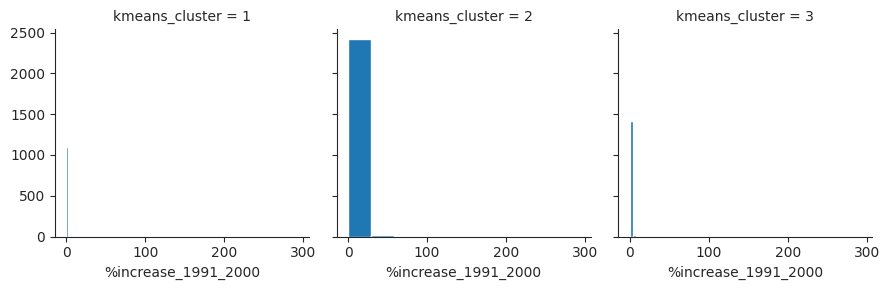

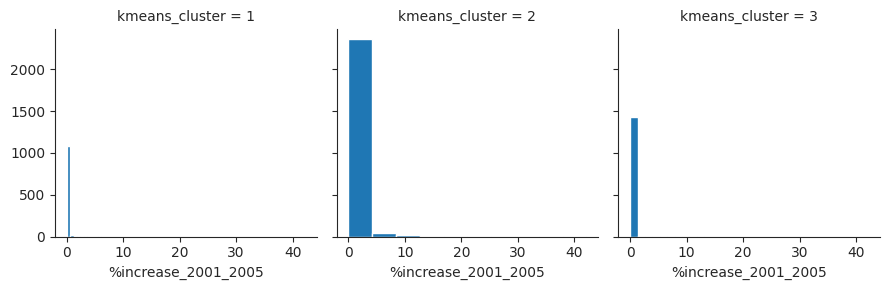

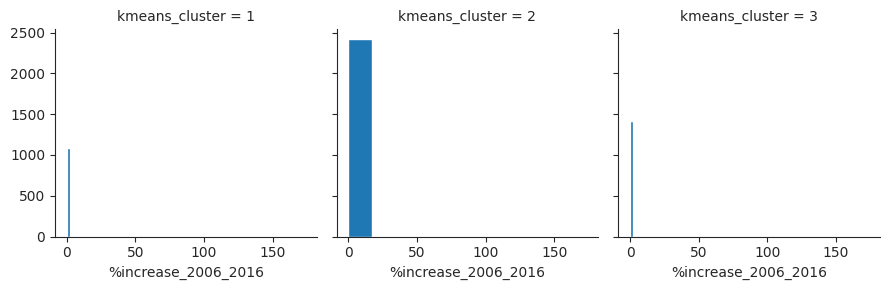

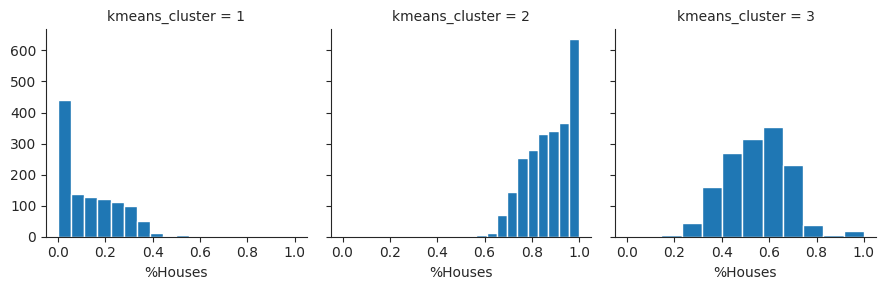

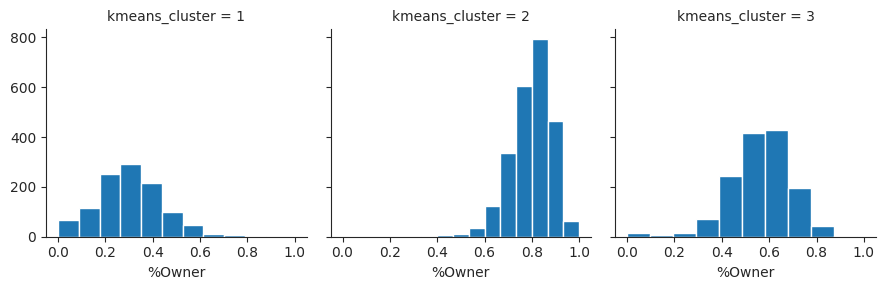

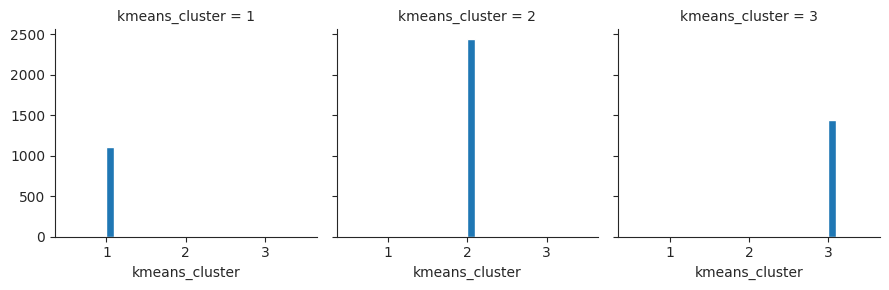

In [ ]:
for c in df4:
    grid= sn.FacetGrid(df4, col='kmeans_cluster')
    grid.map(plt.hist, c)    
    plt.show()

## BIRCH clustering model

In [ ]:
#BIRCH clustering
#threshod=0.1
brc = Birch(n_clusters=3, threshold=0.1)
brc.fit(X)
BIRCH = brc.predict(X)
BIRCH_cluster = pd.DataFrame(data=BIRCH)

#add columns for BIRCH cluster
df6 = df4.copy()
df6['BIRCH'] = BIRCH_cluster[0]

#rename the cluster to 1, 2, 3
df6.replace({'BIRCH':{0: 2, 2:3}}, inplace=True)
df6['BIRCH'].value_counts()

2    2638
1    1524
3     824
Name: BIRCH, dtype: int64

In [ ]:
pd.Series.sort_index(df6['BIRCH'].value_counts())

1    1524
2    2638
3     824
Name: BIRCH, dtype: int64

In [ ]:
df6.head()

,Total_households,Median_income,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Owner,kmeans_cluster,BIRCH
0,1441,68242.12,0.316522,0.694848,0.123149,0.632200,0.637752,3,2
1,1026,88172.37,0.002964,0.000000,0.010837,0.771930,0.758285,2,2
2,2071,103853.38,0.553101,0.057987,0.070838,0.684693,0.734911,2,2
3,2203,82796.63,0.038054,0.000000,0.022274,0.634135,0.577394,3,2
4,1419,91648.22,7.000000,0.133396,0.167901,0.644116,0.835800,2,2


In [ ]:
#aggregate statistics by cluster
df_cluster_summary2 = df6.groupby('BIRCH').describe().T.reset_index()
df_cluster_summary2 = df_cluster_summary2.rename(columns={'level_0':'column','level_1':'metric'})
# mean value for each cluster
df_cluster_summary2 = df_cluster_summary2[df_cluster_summary2['metric'] == "mean"]
df_cluster_summary2 = df_cluster_summary2.set_index('column')
df_cluster_summary2

BIRCH,metric,1,2,3
column,,,,
Total_households,mean,2151.534777,1864.899924,1745.101942
Median_income,mean,53768.583615,94157.116603,66506.873350
%increase_1991_2000,mean,0.429951,1.596416,0.201188
%increase_2001_2005,mean,0.108884,0.556833,0.070104
%increase_2006_2016,mean,0.299238,0.785363,0.184603
%Houses,mean,0.210002,0.841934,0.635874
%Owner,mean,0.385349,0.785091,0.524697
kmeans_cluster,mean,1.554462,2.175512,2.669903


In [ ]:
df_cluster_summary2.T

column,Total_households,Median_income,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Owner,kmeans_cluster
BIRCH,,,,,,,,
metric,mean,mean,mean,mean,mean,mean,mean,mean
1,2151.534777,53768.583615,0.429951,0.108884,0.299238,0.210002,0.385349,1.554462
2,1864.899924,94157.116603,1.596416,0.556833,0.785363,0.841934,0.785091,2.175512
3,1745.101942,66506.87335,0.201188,0.070104,0.184603,0.635874,0.524697,2.669903


In [ ]:
#Compare to K-Means
df_cluster_summary

kmeans_cluster,metric,1,2,3
column,,,,
Total_households,mean,2149.384615,1816.649590,1963.090909
Median_income,mean,47132.269683,95927.755324,68692.975489
%increase_1991_2000,mean,0.232864,1.699553,0.435911
%increase_2001_2005,mean,0.085467,0.580054,0.126896
%increase_2006_2016,mean,0.301417,0.816493,0.246100
%Houses,mean,0.130944,0.873826,0.546979
%Owner,mean,0.300857,0.798053,0.562803


In [ ]:
# join into single summary dataset
df_profile_overall2 = df6.describe().T
df_profile2 = df_cluster_summary2.join(df_profile_overall2) # joins on Index
df_profile2

,metric,1,2,3,count,mean,std,min,25%,50%,75%,max
column,,,,,,,,,,,,
Total_households,mean,2151.534777,1864.899924,1745.101942,4986.0,1932.713398,971.627854,0.0,1340.000000,1825.500000,2430.500000,15388.000000
Median_income,mean,53768.583615,94157.116603,66506.873350,4986.0,77242.570933,33368.749963,0.0,53048.870000,76191.270000,95350.202500,669559.560000
%increase_1991_2000,mean,0.429951,1.596416,0.201188,4986.0,1.009300,5.692981,0.0,0.048861,0.121674,0.331140,292.500000
%increase_2001_2005,mean,0.108884,0.556833,0.070104,4986.0,0.339476,1.765947,0.0,0.012401,0.037798,0.116125,42.142857
%increase_2006_2016,mean,0.299238,0.785363,0.184603,4986.0,0.537493,4.515658,0.0,0.040324,0.098747,0.242171,173.285714
%Houses,mean,0.210002,0.841934,0.635874,4986.0,0.614727,0.313937,0.0,0.380631,0.700193,0.885444,1.000000
%Owner,mean,0.385349,0.785091,0.524697,4986.0,0.619874,0.227888,0.0,0.463372,0.677782,0.808926,1.000000
kmeans_cluster,mean,1.554462,2.175512,2.669903,4986.0,2.067389,0.711470,1.0,2.000000,2.000000,3.000000,3.000000


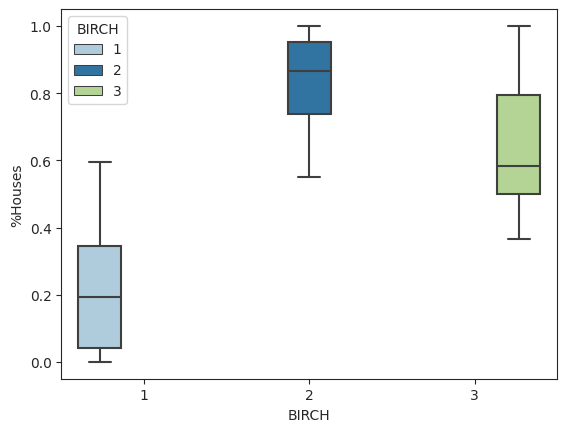

In [ ]:
# %House by cluster
sn.boxplot(x="BIRCH", y="%Houses", data=df6, palette='Paired', hue = "BIRCH") #, color='skyblue', palette='hls', Set2, Paired

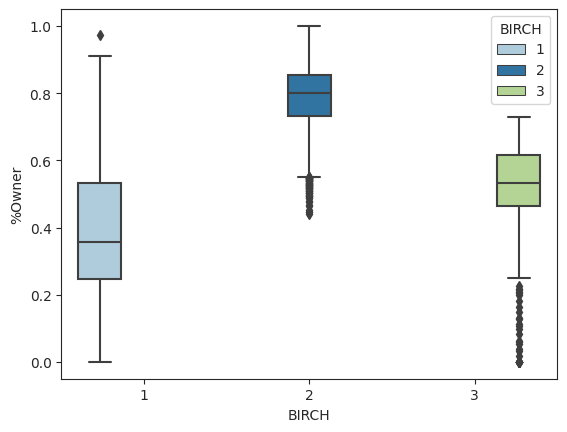

In [ ]:
# %Owner by cluster
sn.boxplot(x="BIRCH", y="%Owner", data=df6, palette='Paired', hue = "BIRCH") #, color='skyblue', palette='hls', Set2, Blues, Paired 

In [ ]:
Cluster_1_B = df6[df6['BIRCH'] == 1]
Cluster_2_B = df6[df6['BIRCH'] == 2]
Cluster_3_B = df6[df6['BIRCH'] == 3]

(0.0, 250000.0)

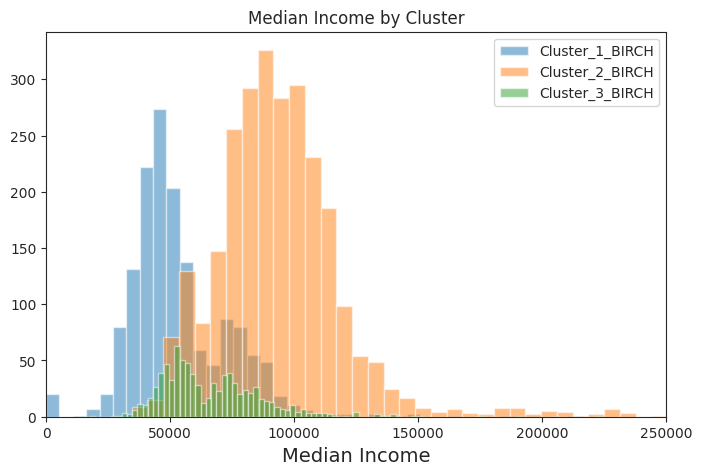

In [ ]:
#Median Income by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1_B['Median_income'], bins=100, alpha=0.5, label="Cluster_1_BIRCH")
plt.hist(Cluster_2_B['Median_income'], bins=100, alpha=0.5, label="Cluster_2_BIRCH")
plt.hist(Cluster_3_B['Median_income'], bins=100, alpha=0.5, label="Cluster_3_BIRCH")
plt.xlabel("Median Income", size=14)
plt.title("Median Income by Cluster")
plt.legend(loc='upper right')
plt.xlim([0, 250000])

(0.0, 8000.0)

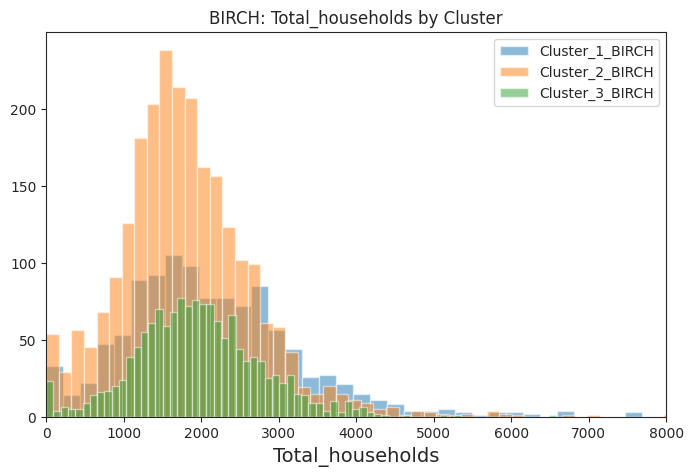

In [ ]:
#Total Household by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1['Total_households'], bins=70, alpha=0.5, label="Cluster_1_BIRCH")
plt.hist(Cluster_2['Total_households'], bins=70, alpha=0.5, label="Cluster_2_BIRCH")
plt.hist(Cluster_3['Total_households'], bins=70, alpha=0.5, label="Cluster_3_BIRCH")
plt.xlabel("Total_households", size=14)
plt.title("BIRCH: Total_households by Cluster")
plt.legend(loc='upper right')
plt.xlim([0, 8000])

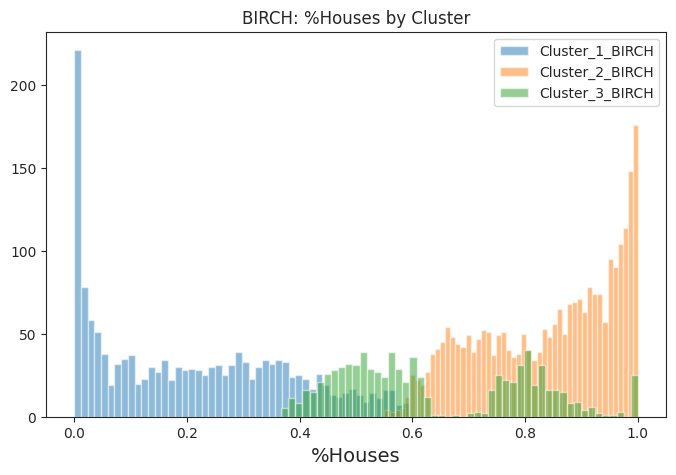

In [ ]:
#%House by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1_B['%Houses'], bins=50, alpha=0.5, label="Cluster_1_BIRCH")
plt.hist(Cluster_2_B['%Houses'], bins=50, alpha=0.5, label="Cluster_2_BIRCH")
plt.hist(Cluster_3_B['%Houses'], bins=50, alpha=0.5, label="Cluster_3_BIRCH")
plt.xlabel("%Houses", size=14)
plt.title("BIRCH: %Houses by Cluster")
plt.legend(loc='upper right')

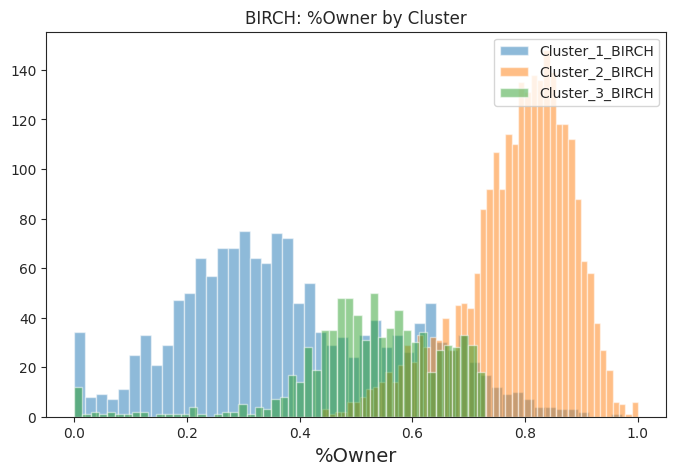

In [ ]:
#%Owner by cluster
plt.figure(figsize=(8,5))
plt.hist(Cluster_1_B['%Owner'], bins=50, alpha=0.5, label="Cluster_1_BIRCH")
plt.hist(Cluster_2_B['%Owner'], bins=50, alpha=0.5, label="Cluster_2_BIRCH")
plt.hist(Cluster_3_B['%Owner'], bins=50, alpha=0.5, label="Cluster_3_BIRCH")
plt.xlabel("%Owner", size=14)
plt.title("BIRCH: %Owner by Cluster")
plt.legend(loc='upper right')

# **Segmentation Modeling: KNN + Regression Tree + Random Forest**

### Split training and validation sets 






In [ ]:
# dataframe for part 2
df_p2 = df4.copy()
df_p2

,Total_households,Median_income,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Owner,kmeans_cluster
0,1441,68242.12,0.316522,0.694848,0.123149,0.632200,0.637752,3
1,1026,88172.37,0.002964,0.000000,0.010837,0.771930,0.758285,2
2,2071,103853.38,0.553101,0.057987,0.070838,0.684693,0.734911,2
3,2203,82796.63,0.038054,0.000000,0.022274,0.634135,0.577394,3
4,1419,91648.22,7.000000,0.133396,0.167901,0.644116,0.835800,2
...,...,...,...,...,...,...,...,...
4981,953,108823.38,14.735294,0.515888,0.175092,0.971668,0.888772,2
4982,3859,68735.64,0.175122,0.185969,0.350718,0.618813,0.674268,3
4983,1895,71370.58,0.450862,0.017231,0.106893,0.357256,0.643272,3
4984,1038,58258.26,0.123537,0.015046,0.183580,0.766859,0.526012,3


In [ ]:
X = df_p2.drop(columns=["Median_income"])
y = df_p2.drop(columns=["Total_households", "%increase_1991_2000", "%increase_2001_2005", "%increase_2006_2016", "%Houses", "%Owner"])

In [ ]:
test_size = 0.25
seed = 88

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=seed)

In [ ]:
X_train.shape

(3739, 7)

In [ ]:
X_test.shape

(1247, 7)

In [ ]:
X_train

,Total_households,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Owner,kmeans_cluster
1213,2303,0.146868,0.018832,0.064233,0.515849,0.504125,3
4691,1684,0.278013,0.123242,0.240059,0.976841,0.843230,2
4230,3916,0.238004,0.050775,0.444485,0.216037,0.510470,1
1278,1386,45.238095,0.349125,0.058015,0.997114,0.927850,2
4828,2065,0.061203,0.016550,0.018747,0.097821,0.261017,1
...,...,...,...,...,...,...,...
4709,1457,0.013504,0.006311,0.015331,0.949897,0.731640,2
362,2256,0.279093,0.037008,0.677323,0.782358,0.817819,2
2481,2370,0.544106,0.044489,0.147144,0.983966,0.878903,2
4047,710,0.166976,0.033386,0.092308,0.849296,0.823944,2


In [ ]:
y_train

,Median_income,kmeans_cluster
1213,54740.86,3
4691,133890.48,2
4230,73450.30,1
1278,124435.31,2
4828,42499.01,1
...,...,...
4709,88057.00,2
362,86790.54,2
2481,104828.88,2
4047,90475.81,2


In [ ]:
y_test

,Median_income,kmeans_cluster
1783,77911.73,3
2666,57679.37,3
4549,67161.92,3
3637,82165.39,2
4627,43671.58,3
...,...,...
1037,97259.90,2
4348,83098.25,2
2422,128775.04,2
2513,42014.56,1


### Clustering training set and validation set 




In [ ]:
# identify segments, ie. clusters for training set 
X_cluster1_train = X_train[X_train['kmeans_cluster'] == 1.0]
X_cluster2_train = X_train[X_train['kmeans_cluster'] == 2.0]
X_cluster3_train = X_train[X_train['kmeans_cluster'] == 3.0]

X_cluster1_train= X_cluster1_train.drop(columns="kmeans_cluster")
X_cluster2_train= X_cluster2_train.drop(columns="kmeans_cluster")
X_cluster3_train= X_cluster3_train.drop(columns="kmeans_cluster")

In [ ]:
y_cluster1_train = y_train[y_train['kmeans_cluster'] == 1.0]
y_cluster2_train = y_train[y_train['kmeans_cluster'] == 2.0]
y_cluster3_train = y_train[y_train['kmeans_cluster'] == 3.0]

y_cluster1_train= y_cluster1_train.drop(columns="kmeans_cluster")
y_cluster2_train= y_cluster2_train.drop(columns="kmeans_cluster")
y_cluster3_train= y_cluster3_train.drop(columns="kmeans_cluster")

In [ ]:
# overview of the training set
train_summary = X_train.groupby('kmeans_cluster').describe().T.reset_index()
train_summary = train_summary.rename(columns={'level_0':'column','level_1':'metric'})

train_summary = train_summary[train_summary['metric'] == "mean"]
train_summary = train_summary.set_index('column')
train_summary

kmeans_cluster,metric,1,2,3
column,,,,
Total_households,mean,2164.886473,1828.638692,1952.375465
%increase_1991_2000,mean,0.233713,1.642118,0.475592
%increase_2001_2005,mean,0.090364,0.568007,0.131496
%increase_2006_2016,mean,0.325745,0.804329,0.238987
%Houses,mean,0.132943,0.873627,0.547311
%Owner,mean,0.304167,0.796336,0.561555


In [ ]:
X_train = X_train.drop(columns="kmeans_cluster")
y_train = y_train.drop(columns="kmeans_cluster")

In [ ]:
# identify segments, ie. clusters for validation set 
X_cluster1_test = X_test[X_test['kmeans_cluster'] == 1.0]
X_cluster2_test = X_test[X_test['kmeans_cluster'] == 2.0]
X_cluster3_test = X_test[X_test['kmeans_cluster'] == 3.0]

X_cluster1_test= X_cluster1_test.drop(columns="kmeans_cluster")
X_cluster2_test= X_cluster2_test.drop(columns="kmeans_cluster")
X_cluster3_test= X_cluster3_test.drop(columns="kmeans_cluster")

In [ ]:
y_cluster1_test = y_test[y_test['kmeans_cluster'] == 1.0]
y_cluster2_test = y_test[y_test['kmeans_cluster'] == 2.0]
y_cluster3_test = y_test[y_test['kmeans_cluster'] == 3.0]

y_cluster1_test= y_cluster1_test.drop(columns="kmeans_cluster")
y_cluster2_test= y_cluster2_test.drop(columns="kmeans_cluster")
y_cluster3_test= y_cluster3_test.drop(columns="kmeans_cluster")

In [ ]:
# overview of the validation set
validation_summary = X_test.groupby('kmeans_cluster').describe().T.reset_index()
validation_summary = validation_summary.rename(columns={'level_0':'column','level_1':'metric'})

validation_summary = validation_summary[validation_summary['metric'] == "mean"]
validation_summary = validation_summary.set_index('column')
validation_summary

kmeans_cluster,metric,1,2,3
column,,,,
Total_households,mean,2103.046931,1780.285950,1994.679452
%increase_1991_2000,mean,0.230326,1.873757,0.318933
%increase_2001_2005,mean,0.070829,0.616592,0.113336
%increase_2006_2016,mean,0.228695,0.853390,0.267068
%Houses,mean,0.124971,0.874432,0.545999
%Owner,mean,0.290961,0.803261,0.566479


In [ ]:
X_test = X_test.drop(columns="kmeans_cluster")
y_test = y_test.drop(columns="kmeans_cluster")

### Training and Validation Set Size

In [ ]:
from tabulate import tabulate
data = [['Total', X_train.shape[0], X_test.shape[0]],
['Cluster 1', X_cluster1_train.shape[0], X_cluster1_test.shape[0]],
['Cluster 2', X_cluster2_train.shape[0], X_cluster2_test.shape[0]],
['Cluster 3', X_cluster3_train.shape[0], X_cluster3_test.shape[0]]]
print (tabulate(data, headers=["Dataset", "Training Set Size", "Validation Set Size"]))

Dataset      Training Set Size    Validation Set Size
---------  -------------------  ---------------------
Total                     3739                   1247
Cluster 1                  828                    277
Cluster 2                 1835                    605
Cluster 3                 1076                    365


## KNN

### A Global KNN model on training set





In [ ]:
from numpy import arange
from pandas import read_table
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Rescale Training X
scaler = MinMaxScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

# Rescale Test X
scaler = MinMaxScaler().fit(X_test)
rescaled_X_test = scaler.transform(X_test)

In [ ]:
seed = 88
num_folds = 5

scoring = 'neg_mean_absolute_error'

k_values = np.arange(1,30) # try k values

param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaled_X_train, y_train)

print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: -13997.516795 using {'n_neighbors': 26}


Text(0, 0.5, 'Negative Mean Absolute Error')

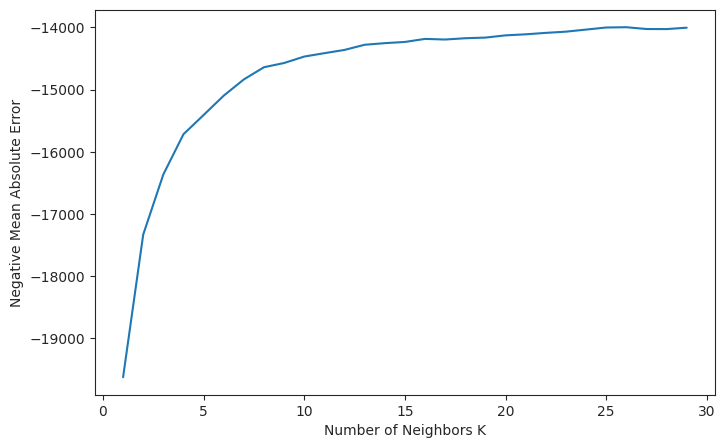

In [ ]:
# all of the means, standard deviations, and parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

plt.figure(figsize = (8,5))
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Absolute Error")

In [ ]:
best_neighbour= grid_result.best_estimator_.get_params()['n_neighbors']

model = KNeighborsRegressor(n_neighbors = best_neighbour)

# take all the training data and fit the model
model.fit(rescaled_X_train, y_train)

KNeighborsRegressor(n_neighbors=26)

In [ ]:
# calculate training MAE
y_pred_train = model.predict(rescaled_X_train)
train_MAE_global = round(mean_absolute_error(y_train, y_pred_train),2)
train_MAE_global

13469.06

In [ ]:
# calculate test MAE
y_pred_test = model.predict(rescaled_X_test)
test_MAE_global = round(mean_absolute_error(y_test, y_pred_test),2)
test_MAE_global

14484.45

### KNN Segmentation model on cluster 1

In [ ]:
# Rescale Training X for Cluster 1
scaler = MinMaxScaler().fit(X_cluster1_train)
rescaled_X_train1 = scaler.transform(X_cluster1_train)

# Rescale Test X for Cluster 1
scaler = MinMaxScaler().fit(X_cluster1_test)
rescaled_X_test1 = scaler.transform(X_cluster1_test)

In [ ]:
seed = 88
num_folds = 5

scoring = 'neg_mean_absolute_error'

k_values = np.arange(1,30) # try k values

param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaled_X_train1, y_cluster1_train)

print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: -9274.398648 using {'n_neighbors': 15}


Text(0, 0.5, 'Negative Mean Absolute Error')

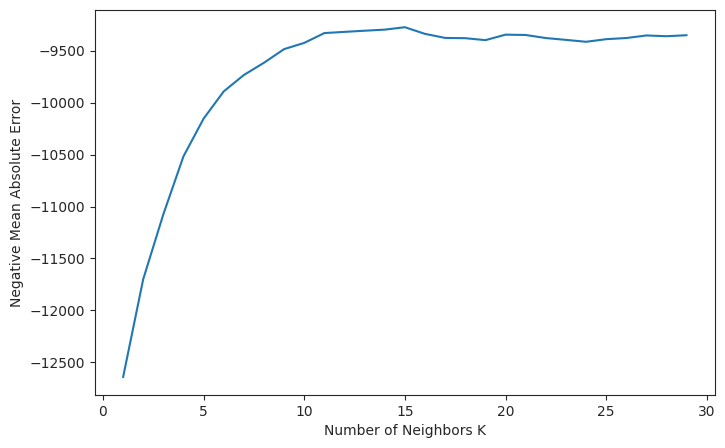

In [ ]:
# all of the means, standard deviations, and parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

plt.figure(figsize = (8,5))
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Absolute Error")

In [ ]:
best_neighbour1= grid_result.best_estimator_.get_params()['n_neighbors']
model1 = KNeighborsRegressor(n_neighbors = best_neighbour1)

# take cluster 1 training data and fit the model
model1.fit(rescaled_X_train1, y_cluster1_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
# calculate training MAE
y_pred_train1 = model1.predict(rescaled_X_train1)
train_MAE1 = round(mean_absolute_error(y_cluster1_train, y_pred_train1),2)
train_MAE1

8645.57

In [ ]:
# calculate test MAE
y_pred_test1 = model1.predict(rescaled_X_test1)
test_MAE1 = round(mean_absolute_error(y_cluster1_test, y_pred_test1),2)
test_MAE1

7727.25

### KNN Segmentation model on cluster 2

In [ ]:
# Rescale Training X for Cluster 2
scaler = MinMaxScaler().fit(X_cluster2_train)
rescaled_X_train2 = scaler.transform(X_cluster2_train)

# Rescale Test X for Cluster 2
scaler = MinMaxScaler().fit(X_cluster2_test)
rescaled_X_test2 = scaler.transform(X_cluster2_test)

In [ ]:
seed = 88
num_folds = 5

scoring = 'neg_mean_absolute_error'

k_values = np.arange(1,30) # try k values

param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaled_X_train2, y_cluster2_train)

print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: -16477.227163 using {'n_neighbors': 24}


Text(0, 0.5, 'Negative Mean Absolute Error')

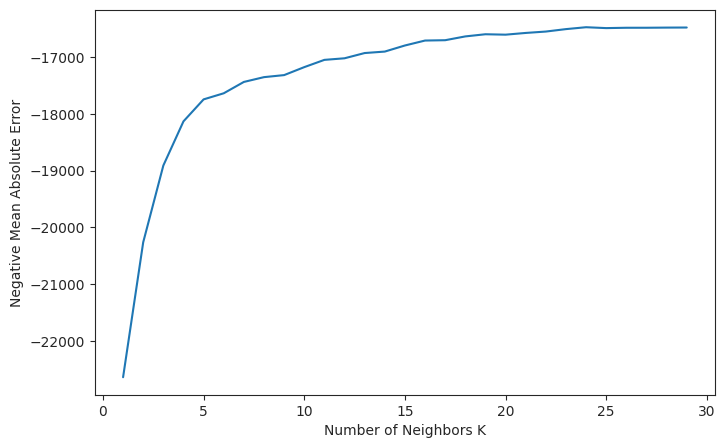

In [ ]:
# all of the means, standard deviations, and parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

plt.figure(figsize = (8,5))
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Absolute Error")

In [ ]:
best_neighbour2= grid_result.best_estimator_.get_params()['n_neighbors']
model2 = KNeighborsRegressor(n_neighbors = best_neighbour2)

# take cluster 2 training data and fit the model
model2.fit(rescaled_X_train2, y_cluster2_train)

KNeighborsRegressor(n_neighbors=24)

In [ ]:
# calculate training MAE
y_pred_train2 = model2.predict(rescaled_X_train2)
train_MAE2 = round(mean_absolute_error(y_cluster2_train, y_pred_train2),2)
train_MAE2

15856.72

In [ ]:
# calculate test MAE
y_pred_test2 = model2.predict(rescaled_X_test2)
test_MAE2 = round(mean_absolute_error(y_cluster2_test, y_pred_test2),2)
test_MAE2

17351.2

### KNN Segmentation model on cluster 3

In [ ]:
# Rescale Training X for Cluster 3
scaler = MinMaxScaler().fit(X_cluster3_train)
rescaled_X_train3 = scaler.transform(X_cluster3_train)

# Rescale Test X for Cluster 3
scaler = MinMaxScaler().fit(X_cluster3_test)
rescaled_X_test3 = scaler.transform(X_cluster3_test)

In [ ]:
seed = 88
num_folds = 5

scoring = 'neg_mean_absolute_error'

k_values = np.arange(1,30) # try k values

param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaled_X_train3, y_cluster3_train)

print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: -13274.724167 using {'n_neighbors': 28}


Text(0, 0.5, 'Negative Mean Absolute Error')

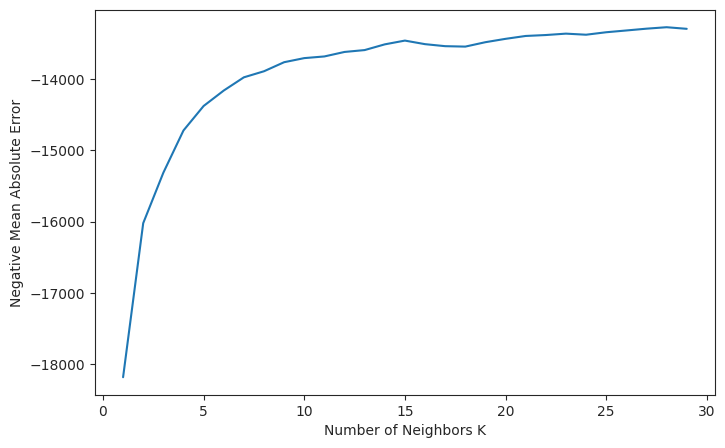

In [ ]:
# all of the means, standard deviations, and parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

plt.figure(figsize = (8,5))
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Absolute Error")

In [ ]:
best_neighbour3= grid_result.best_estimator_.get_params()['n_neighbors']
model3 = KNeighborsRegressor(n_neighbors = best_neighbour3)

# take cluster 3 training data and fit the model
model3.fit(rescaled_X_train3, y_cluster3_train)

KNeighborsRegressor(n_neighbors=28)

In [ ]:
# calculate training MAE
y_pred_train3 = model3.predict(rescaled_X_train3)
train_MAE3 = round(mean_absolute_error(y_cluster3_train, y_pred_train3),2)
train_MAE3

12955.44

In [ ]:
# calculate test MAE
y_pred_test3 = model3.predict(rescaled_X_test3)
test_MAE3 = round(mean_absolute_error(y_cluster3_test, y_pred_test3),2)
test_MAE3

14362.79

### Compare KNN Global Model and Segmentation Models

In [ ]:
print("Global KNN n_neighbors =", best_neighbour, '\n'
      "Cluster 1 KNN n_neighbors =", best_neighbour1, '\n'
      "Cluster 2 KNN n_neighbors =", best_neighbour2, '\n'
      "Cluster 3 KNN n_neighbors =", best_neighbour3)

Global KNN n_neighbors = 26 
Cluster 1 KNN n_neighbors = 15 
Cluster 2 KNN n_neighbors = 24 
Cluster 3 KNN n_neighbors = 28


In [ ]:
from tabulate import tabulate
data = [['Training Data', train_MAE_global, test_MAE_global],
['Cluster 1',train_MAE1, test_MAE1],
['Cluster 2', train_MAE2, test_MAE2],
['Cluster 3', train_MAE3, test_MAE3]]
print (tabulate(data, headers=["Dataset", "Training MAE", "Testing MAE"]))

Dataset          Training MAE    Testing MAE
-------------  --------------  -------------
Training Data        13469.1        14484.5
Cluster 1             8645.57        7727.25
Cluster 2            15856.7        17351.2
Cluster 3            12955.4        14362.8


## Regression Tree

In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 3.1 MB/s 


In [ ]:
import graphviz
import json
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error
from dmba import classificationSummary
from sklearn.model_selection import train_test_split

no display found. Using non-interactive Agg backend


### A Global Regression Tree model on training set


In [ ]:
#min_samples_leaf: the minimum number of samples required to be at a leaf node. Minimum 50 as per assignment requirements
RegressionTree = DecisionTreeRegressor(min_samples_leaf=50 ,random_state=88)

In [ ]:
RegressionTree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=50, random_state=88)

In [ ]:
y_predicted = RegressionTree.predict(X_test)

In [ ]:
expected_y  = y_test

In [ ]:
print("Max depth: " + str(RegressionTree.tree_.max_depth))
print("Node count: " + str(RegressionTree.tree_.node_count))

Max depth: 11
Node count: 117


In [ ]:
print("Tree description: " )
RegressionTree.get_params()

Tree description: 


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 88,
 'splitter': 'best'}

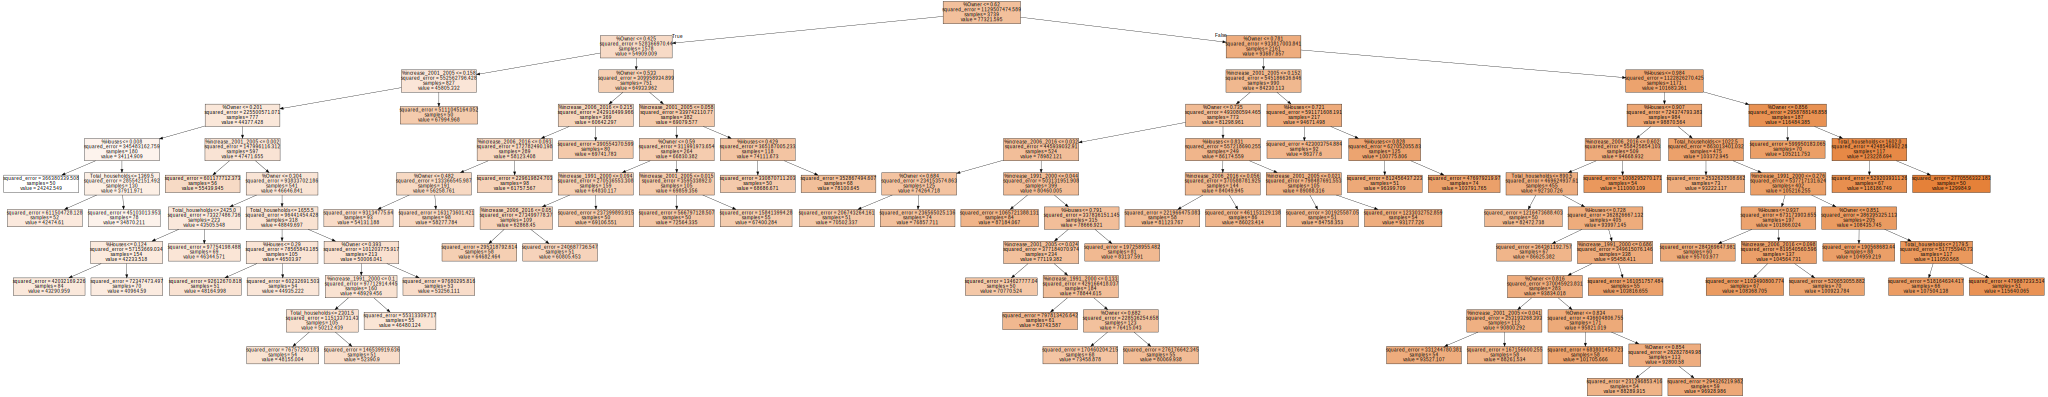

In [ ]:
dot_data = tree.export_graphviz(RegressionTree, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
rt_global_training_mae = mean_absolute_error(y_train, RegressionTree.predict(X_train))
rt_global_testing_mae =mean_absolute_error(expected_y, y_predicted)
print("   Global training: "+ str(rt_global_training_mae))
print("   Global testing: " + str(rt_global_testing_mae))


Mean absolute errors for:
   Global training: 13437.655741654231
   Global testing: 14026.56550241279


In [ ]:
rt_global_r2 = r2_score(expected_y, y_predicted)
rt_global_r2

0.4432760757706604

### Regression Tree Segmentation model on cluster 1


In [ ]:
#min_samples_leaf: the minimum number of samples required to be at a leaf node. Minimum 50 as per assignment requirements
RegressionTree_cluster1 = DecisionTreeRegressor(min_samples_leaf=50 ,random_state=88)

In [ ]:
RegressionTree_cluster1.fit(X_cluster1_train, y_cluster1_train)

DecisionTreeRegressor(min_samples_leaf=50, random_state=88)

In [ ]:
y_predicted_cluster1 = RegressionTree_cluster1.predict(X_cluster1_test)

In [ ]:
expected_y_cluster1  = y_cluster1_test.Median_income


In [ ]:
rt_cluster1_err = expected_y_cluster1 - y_predicted_cluster1

In [ ]:
print("Max depth: " + str(RegressionTree_cluster1.tree_.max_depth))
print("Node count: " + str(RegressionTree_cluster1.tree_.node_count))

Max depth: 6
Node count: 27


In [ ]:
print("Tree description: " )
RegressionTree_cluster1.get_params()

Tree description: 


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 88,
 'splitter': 'best'}

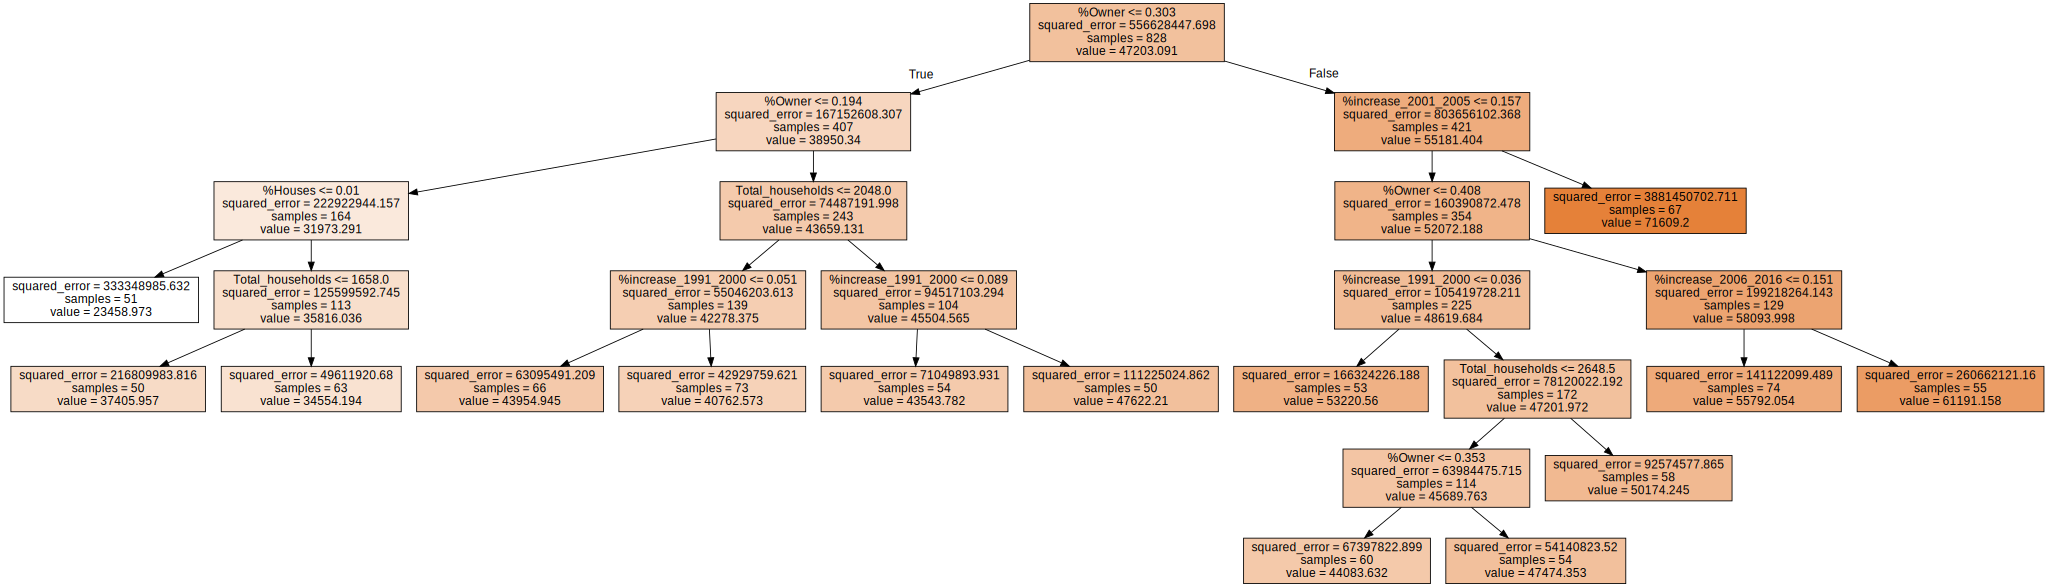

In [ ]:
dot_data = tree.export_graphviz(RegressionTree_cluster1, out_file=None, 
                                feature_names=X_cluster1_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
rt_cluster1_training_mae = mean_absolute_error(y_cluster1_train, RegressionTree_cluster1.predict(X_cluster1_train))
rt_cluster1_testing_mae =mean_absolute_error(expected_y_cluster1, y_predicted_cluster1)
print("   Cluster 1 training: "+ str(rt_cluster1_training_mae))
print("   Cluster 1 testing: " + str(rt_cluster1_testing_mae))


Mean absolute errors for:
   Cluster 1 training: 9428.267730892609
   Cluster 1 testing: 8575.690784072685


### Regression Tree Segmentation model on cluster 2

In [ ]:
#min_samples_leaf: the minimum number of samples required to be at a leaf node. Minimum 50 as per assignment requirements
RegressionTree_cluster2 = DecisionTreeRegressor(min_samples_leaf=50 ,random_state=88)

In [ ]:
RegressionTree_cluster2.fit(X_cluster2_train, y_cluster2_train)

DecisionTreeRegressor(min_samples_leaf=50, random_state=88)

In [ ]:
y_predicted_cluster2 = RegressionTree_cluster2.predict(X_cluster2_test)
expected_y_cluster2  = y_cluster2_test

In [ ]:
import statistics
statistics.median(expected_y_cluster2)

'Median_income'

In [ ]:
print("Max depth: " + str(RegressionTree_cluster2.tree_.max_depth))
print("Node count: " + str(RegressionTree_cluster2.tree_.node_count))

Max depth: 9
Node count: 59


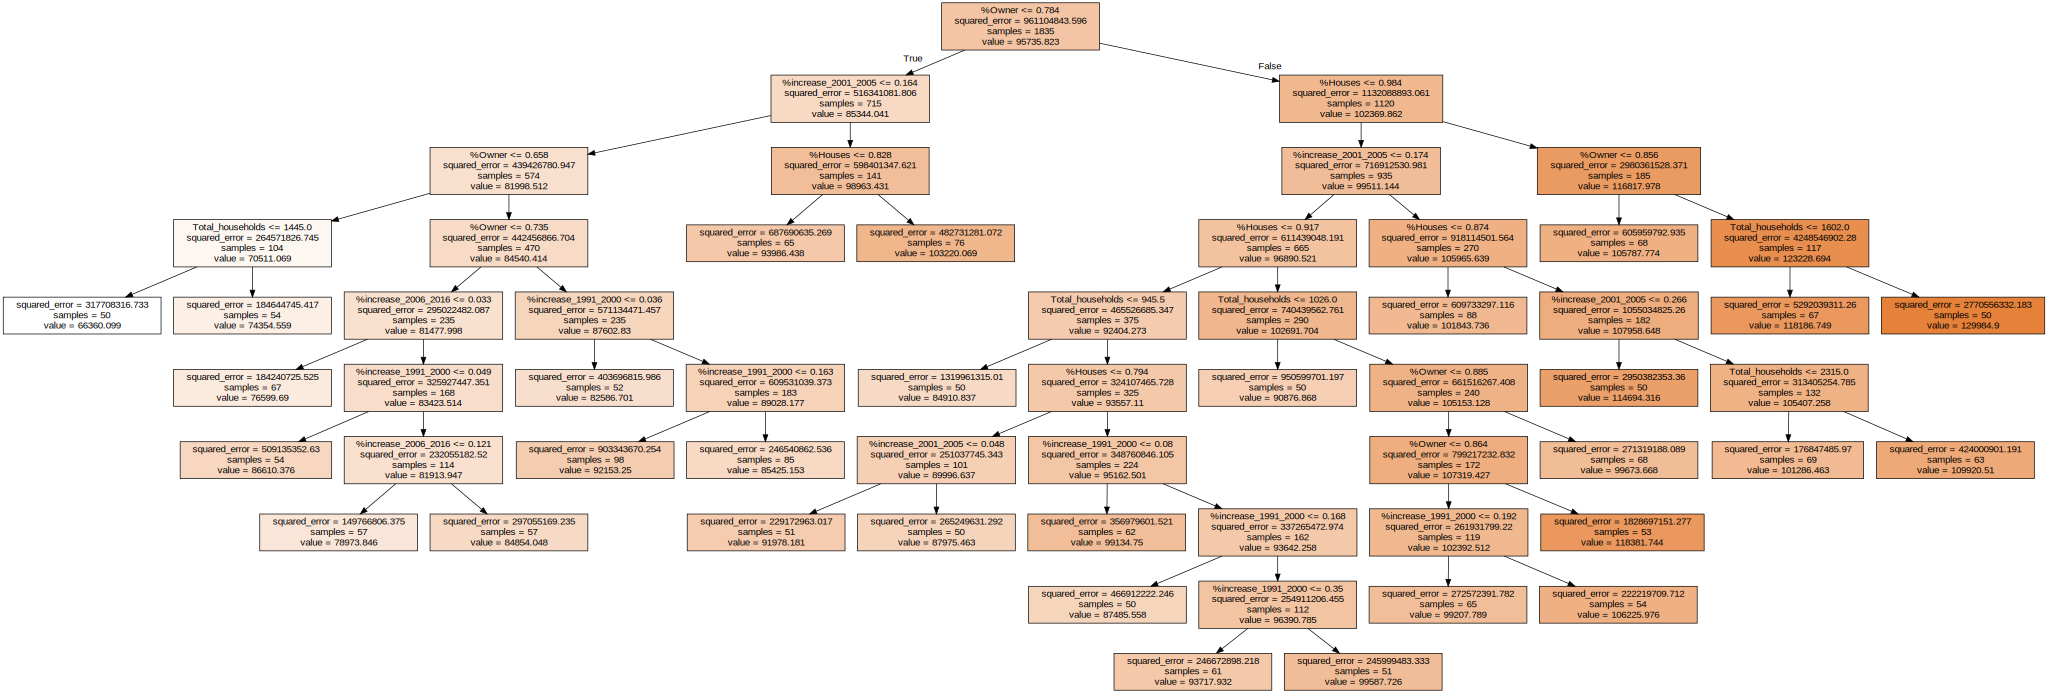

In [ ]:
dot_data = tree.export_graphviz(RegressionTree_cluster2, out_file=None, 
                                feature_names=X_cluster2_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
rt_cluster2_training_mae = mean_absolute_error(y_cluster2_train, RegressionTree_cluster2.predict(X_cluster2_train))
rt_cluster2_testing_mae =mean_absolute_error(expected_y_cluster2, y_predicted_cluster2)
print("   Cluster 2 training: "+ str(rt_cluster2_training_mae))
print("   Cluster 2 testing: " + str(rt_cluster2_testing_mae))

Mean absolute errors for:
   Cluster 2 training: 15690.7550234041
   Cluster 2 testing: 17703.886633496913


### Regression Tree Segmentation model on cluster 3


In [ ]:
#min_samples_leaf: the minimum number of samples required to be at a leaf node. Minimum 50 as per assignment requirements
RegressionTree_cluster3 = DecisionTreeRegressor(min_samples_leaf=50 ,random_state=88)

In [ ]:
RegressionTree_cluster3.fit(X_cluster3_train, y_cluster3_train)

DecisionTreeRegressor(min_samples_leaf=50, random_state=88)

In [ ]:
y_predicted_cluster3 = RegressionTree_cluster3.predict(X_cluster3_test)
expected_y_cluster3  = y_cluster3_test

In [ ]:
statistics.median(expected_y_cluster3)

'Median_income'

In [ ]:
print("Max depth: " + str(RegressionTree_cluster3.tree_.max_depth))
print("Node count: " + str(RegressionTree_cluster3.tree_.node_count))

Max depth: 6
Node count: 35


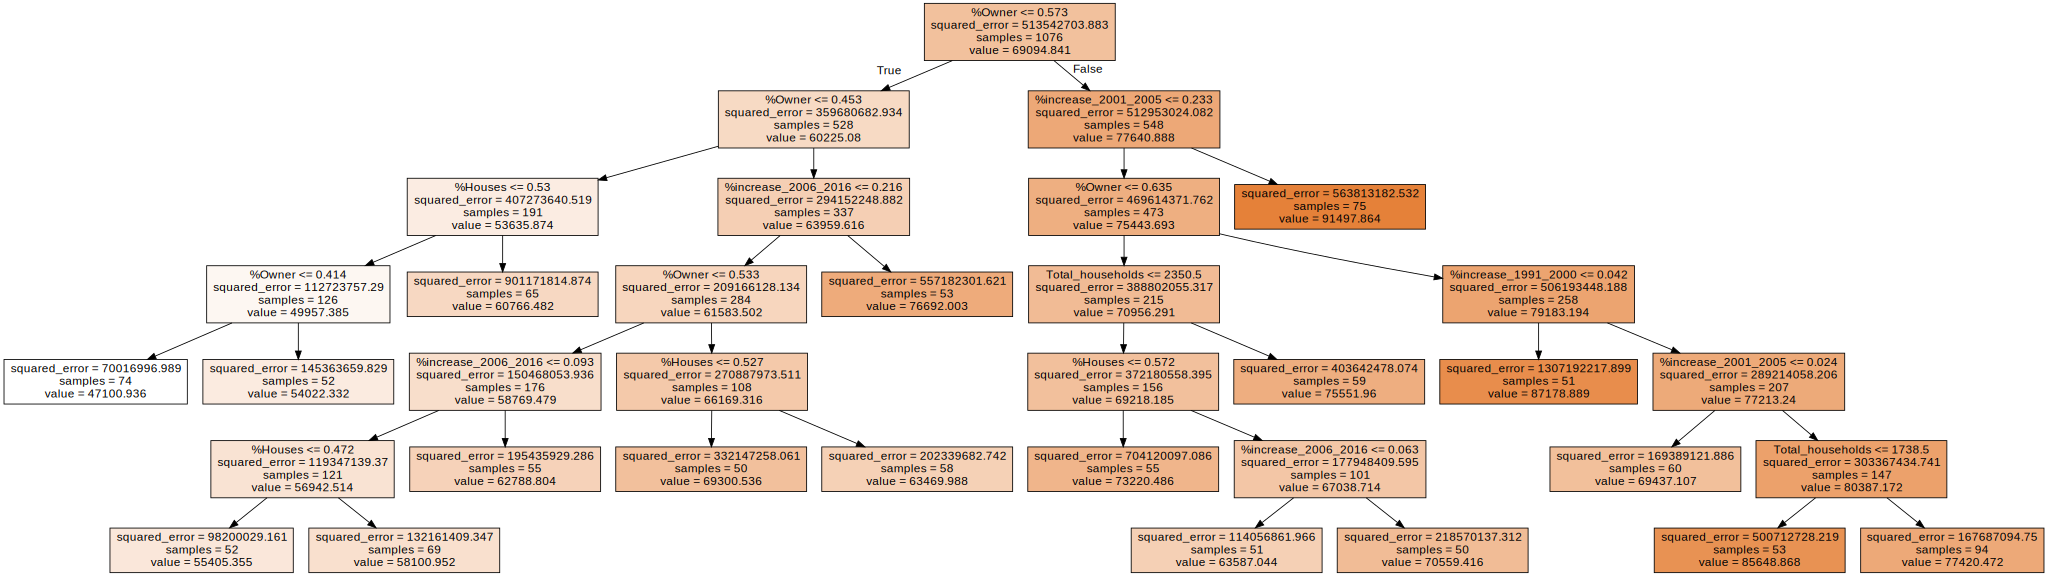

In [ ]:
dot_data = tree.export_graphviz(RegressionTree_cluster3, out_file=None, 
                                feature_names=X_cluster3_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
rt_cluster3_training_mae = mean_absolute_error(y_cluster3_train, RegressionTree_cluster3.predict(X_cluster3_train))
rt_cluster3_testing_mae =mean_absolute_error(expected_y_cluster3, y_predicted_cluster3)
print("   Cluster 3 training: "+ str(rt_cluster3_training_mae))
print("   Cluster 3 testing: " + str(rt_cluster3_testing_mae))


Mean absolute errors for:
   Cluster 3 training: 12522.915579134979
   Cluster 3 testing: 12260.839446474929


## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor # for building the model

### A Global Random Forest Model on training set

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 128, random_state = 0)

# Fitting the Random Forest Regression model to the data
rf.fit(X_train, y_train)

<ipython-input-139-5b10ff27016e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=128, random_state=0)

In [ ]:
y_predicted = rf.predict(X_test)
mean_y_global_rf = y_predicted.mean()
y_predicted

array([ 71307.90125   ,  72652.82898438,  73259.52773437, ...,
       102554.67914063,  51540.684375  , 115409.31648437])

In [ ]:
y_expected = y_test.Median_income
y_expected

1783     77911.73
2666     57679.37
4549     67161.92
3637     82165.39
4627     43671.58
          ...    
1037     97259.90
4348     83098.25
2422    128775.04
2513     42014.56
697     106365.99
Name: Median_income, Length: 1247, dtype: float64

In [ ]:
expected_test = y_expected.mean()
expected_test

77005.62601443465

In [ ]:
rf_global_err = y_expected - y_predicted

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
global_rf_train_mae = mean_absolute_error(y_train, rf.predict(X_train))
global_rf_test_mae =mean_absolute_error(y_expected.to_numpy(), y_predicted)
print("   training: "+ str(global_rf_train_mae))
print("   testing: " + str(global_rf_test_mae))


Mean absolute errors for:
   training: 5296.15600990813
   testing: 13726.062523556537


In [ ]:
rf_global_r2 = r2_score(y_expected, y_predicted)

In [ ]:
median_income_global_rf = statistics.mean(y_predicted)
median_income_global_rf

77877.93744962911

### Random Forest Segmentation Model on Cluster 1


In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
rf_cluster1 = RandomForestRegressor(n_estimators = 128, random_state = 0)

# Fitting the Random Forest Regression model to the data
rf_cluster1.fit(X_cluster1_train, y_cluster1_train)

<ipython-input-147-412951b20058>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cluster1.fit(X_cluster1_train, y_cluster1_train)


RandomForestRegressor(n_estimators=128, random_state=0)

In [ ]:
y_predicted_cluster1 = rf_cluster1.predict(X_cluster1_test)
mean_y_cluster1_rf = y_predicted_cluster1.mean()

In [ ]:
y_expected_cluster1 = y_cluster1_test.Median_income

In [ ]:
expected_cluster1 = y_expected_cluster1.mean()
expected_cluster1

46920.57205776173

In [ ]:
rf_cluster1_err = y_expected_cluster1 - y_predicted_cluster1

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
cluster1_rf_train_mae = mean_absolute_error(y_cluster1_train, rf.predict(X_cluster1_train))
cluster1_rf_test_mae =mean_absolute_error(y_expected_cluster1, y_predicted_cluster1)
print("   training: "+ str(cluster1_rf_train_mae))
print("   testing: " + str(cluster1_rf_test_mae))


Mean absolute errors for:
   training: 3726.5008279866147
   testing: 8046.159742215706


In [ ]:
rf_cluster1_r2 = r2_score(y_expected_cluster1, y_predicted_cluster1)
rf_cluster1_r2

0.3326663331725378

In [ ]:
rf_cluster1.feature_importances_

array([0.1493884 , 0.06640284, 0.05986858, 0.38027759, 0.04760037,
       0.29646222])

### Random Forest Segmentation Model on Cluster 2


In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
rf_cluster2 = RandomForestRegressor(n_estimators = 128, random_state = 0)

# Fitting the Random Forest Regression model to the data
rf_cluster2.fit(X_cluster2_train, y_cluster2_train)

<ipython-input-155-88142608db92>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cluster2.fit(X_cluster2_train, y_cluster2_train)


RandomForestRegressor(n_estimators=128, random_state=0)

In [ ]:
y_predicted_cluster2 = rf_cluster2.predict(X_cluster2_test)
mean_y_cluster2_rf = y_predicted_cluster2.mean()

In [ ]:
y_expected_cluster2 = y_cluster2_test.Median_income

In [ ]:
expected_cluster2 = y_expected_cluster2.mean()
expected_cluster2

96509.89814876032

In [ ]:
rf_cluster2_err = y_expected_cluster2 - y_predicted_cluster2

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
cluster2_rf_train_mae = mean_absolute_error(y_cluster2_train, rf.predict(X_cluster2_train))
cluster2_rf_test_mae =mean_absolute_error(y_expected_cluster2, y_predicted_cluster2)
print("   training: "+ str(cluster2_rf_train_mae))
print("   testing: " + str(cluster2_rf_test_mae))


Mean absolute errors for:
   training: 6258.559879745074
   testing: 17339.81398489153


In [ ]:
rf_cluster2_r2 = r2_score(y_expected_cluster2, y_predicted_cluster2)
rf_cluster2_r2

0.07087494017938634

### Random Forest Segmentation Model on Cluster 3

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
rf_cluster3 = RandomForestRegressor(n_estimators = 128, random_state = 0)

# Fitting the Random Forest Regression model to the data
rf_cluster3.fit(X_cluster3_train, y_cluster3_train)

<ipython-input-162-791e629325ab>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cluster3.fit(X_cluster3_train, y_cluster3_train)


RandomForestRegressor(n_estimators=128, random_state=0)

In [ ]:
y_predicted_cluster3 = rf_cluster3.predict(X_cluster3_test)
mean_y_cluster3_rf = y_predicted_cluster3.mean()

In [ ]:
y_expected_cluster3 = y_cluster3_test.Median_income

In [ ]:
expected_cluster3 = y_expected_cluster3.mean()
expected_cluster3

67508.29808219177

In [ ]:
rf_cluster3_err = y_expected_cluster3 - y_predicted_cluster3

In [ ]:
# Evaluating the Model
print("Mean absolute errors for:")
cluster3_rf_train_mae = mean_absolute_error(y_cluster3_train, rf.predict(X_cluster3_train))
cluster3_rf_test_mae =mean_absolute_error(y_expected_cluster3, y_predicted_cluster3)
print("   training: "+ str(cluster3_rf_train_mae))
print("   testing: " + str(cluster3_rf_test_mae))


Mean absolute errors for:
   training: 4862.757672993836
   testing: 12392.196626855022


In [ ]:
rf_cluster3_r2 = r2_score(y_expected_cluster3, y_predicted_cluster3)
rf_cluster3_r2

0.19722679524715692

## **Model Comparison**

In [ ]:
from tabulate import tabulate
data = [
    ["KNN",'Training Data', train_MAE_global, test_MAE_global],
    ["",'Cluster 1', train_MAE1, test_MAE1],
    ["",'Cluster 2', train_MAE2, test_MAE2],
    ["",'Cluster 3', train_MAE3, test_MAE3],
    ["---------------", "-------------", "-----------", "--------"],
    ["Regression Tree",'Training Data', round(rt_global_training_mae,2), round(rt_global_testing_mae,2)],
    ["",'Cluster 1', round(rt_cluster1_training_mae,2), round(rt_cluster1_testing_mae,2)],
    ["",'Cluster 2', round(rt_cluster2_training_mae,2), round(rt_cluster2_testing_mae,2)],
    ["",'Cluster 3', round(rt_cluster3_training_mae,2), round(rt_cluster3_testing_mae,2)],
    ["---------------", "-------------", "-----------", "-------"],
    ["Random Forest",'Training Data', round(global_rf_train_mae,2), round(global_rf_test_mae,2)],
    ["",'Cluster 1', round(cluster1_rf_train_mae,2), round(cluster1_rf_test_mae,2)],
    ["",'Cluster 2', round(cluster2_rf_train_mae,2), round(cluster2_rf_test_mae,2)],
    ["",'Cluster 3', round(cluster3_rf_train_mae,2), round(cluster3_rf_test_mae,2)]
    ]
print (tabulate(data, headers=["Model", "Dataset", "Training MAE", "Testing MAE"]))

Model            Dataset        Training MAE    Testing MAE
---------------  -------------  --------------  -------------
KNN              Training Data  13469.06        14484.45
                 Cluster 1      8645.57         7727.25
                 Cluster 2      15856.72        17351.2
                 Cluster 3      12955.44        14362.79
---------------  -------------  -----------     --------
Regression Tree  Training Data  13437.66        14026.57
                 Cluster 1      9428.27         8575.69
                 Cluster 2      15690.76        17703.89
                 Cluster 3      12522.92        12260.84
---------------  -------------  -----------     -------
Random Forest    Training Data  5296.16         13726.06
                 Cluster 1      3726.5          8046.16
                 Cluster 2      6258.56         17339.81
                 Cluster 3      4862.76         12392.2


###Compare 3 model MAEs on 3 Clusters

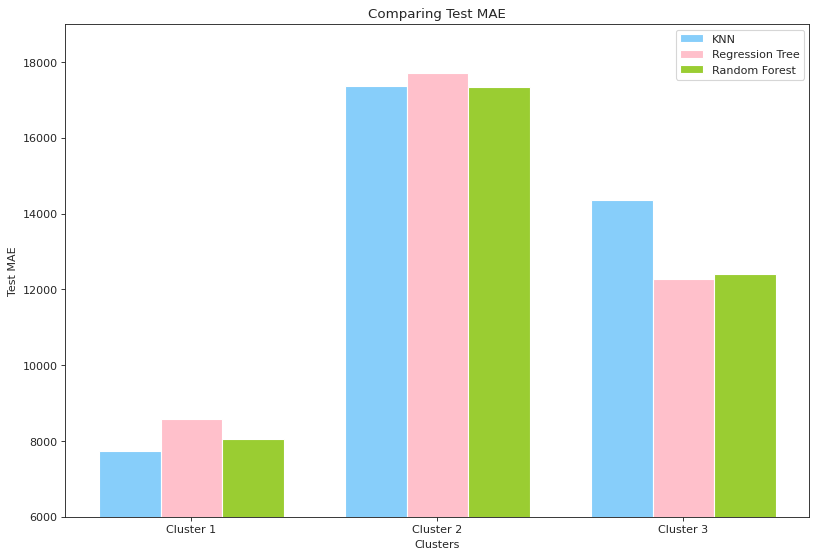

In [ ]:
plt.figure(figsize=(12, 8), dpi=80)
N = 3
ind = np.arange(N) 
width = 0.25
  
knn_mae = [test_MAE1, test_MAE2, test_MAE3]
bar1 = plt.bar(ind, knn_mae, width, color = 'lightskyblue')
  
tree_mae = [rt_cluster1_testing_mae, rt_cluster2_testing_mae, rt_cluster3_testing_mae]
bar2 = plt.bar(ind+width, tree_mae, width, color='pink')
  
rf_mae = [cluster1_rf_test_mae, cluster2_rf_test_mae, cluster3_rf_test_mae]
bar3 = plt.bar(ind+width*2, rf_mae, width, color = 'yellowgreen')


plt.xlabel("Clusters")
plt.ylabel('Test MAE')
plt.title("Comparing Test MAE")
plt.xticks(ind+width,['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.ylim(6000, 19000)
plt.legend( (bar1, bar2, bar3), ('KNN', 'Regression Tree', 'Random Forest') )
plt.show()

### Feature Importance

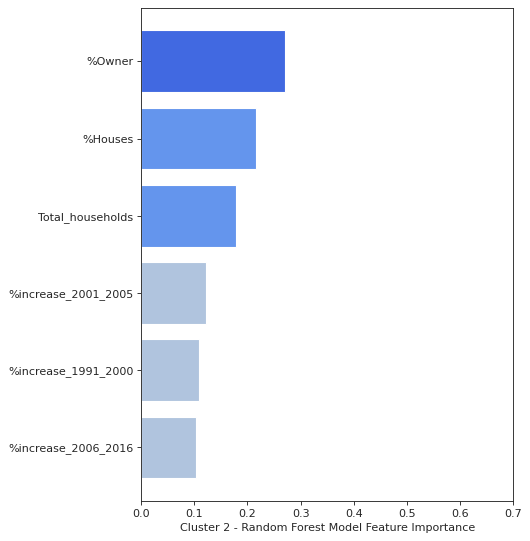

In [ ]:
#Random Forest on Cluster 2 Feature Importance
rf_cluster2.feature_importances_
col_map = plt.get_cmap('Paired')
color_list = ["lightsteelblue","lightsteelblue", "lightsteelblue", "cornflowerblue","cornflowerblue", "royalblue"]
sorted_idx = rf_cluster2.feature_importances_.argsort()
plt.figure(figsize=(6, 8), dpi=80)
plt.barh(X_cluster2_train.columns[sorted_idx], rf_cluster2.feature_importances_[sorted_idx],color=color_list)
plt.xlim(0,0.7)
plt.xlabel("Cluster 2 - Random Forest Model Feature Importance")
plt.show()

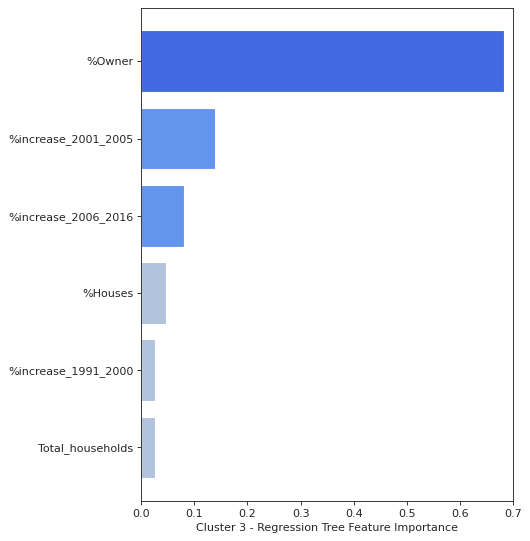

In [ ]:
#Regression Tree on Cluster 3 Feature Importance
RegressionTree_cluster3.feature_importances_
col_map = plt.get_cmap('Paired')
color_list = ["lightsteelblue","lightsteelblue", "lightsteelblue", "cornflowerblue","cornflowerblue", "royalblue"]
sorted_idx = RegressionTree_cluster3.feature_importances_.argsort()
plt.figure(figsize=(6, 8), dpi=80)
plt.barh(X_cluster3_train.columns[sorted_idx], RegressionTree_cluster3.feature_importances_[sorted_idx],color=color_list)
plt.xlim(0,0.7)
plt.xlabel("Cluster 3 - Regression Tree Feature Importance")
plt.show()

# Test Set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CensusCanada2016Test.csv to CensusCanada2016Test.csv


## Data PreProcessing and Kmeans Clustering


In [ ]:
df_test = pd.read_csv("CensusCanada2016Test.csv",encoding='latin-1') #Reads csv as pandas dataframe
df_test.head()

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,2692,893,893,15,21,46,648,114,883,10,0,836,790,46
1,3884,1511,1511,17,839,218,27,33,1025,486,0,1399,1207,192
2,7014,2768,2768,767,615,223,435,166,1390,1378,0,2552,1533,1019
3,9136,4577,4577,1540,969,437,244,457,2102,2461,14,4232,2402,1830
4,3614,1167,1167,44,94,34,115,184,1069,98,0,1080,1042,38


In [ ]:
df_test.shape

(721, 14)

In [ ]:
df_test.describe()

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,4896.120666,1914.248266,1914.248266,373.642164,544.603329,254.993065,242.693481,151.747573,1116.055479,783.589459,14.603329,1795.196949,1176.969487,618.117892
std,2542.570067,976.666808,976.666808,428.887867,443.021928,248.224498,270.706081,240.738038,783.356384,900.116318,57.194145,903.063102,698.171158,597.237314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.000000,1243.000000,1243.000000,44.000000,173.000000,76.000000,54.000000,16.000000,515.000000,126.000000,0.000000,1186.000000,670.000000,169.000000
50%,4619.000000,1822.000000,1822.000000,211.000000,471.000000,174.000000,143.000000,55.000000,1064.000000,479.000000,0.000000,1718.000000,1131.000000,432.000000
75%,6294.000000,2443.000000,2443.000000,604.000000,816.000000,360.000000,342.000000,178.000000,1555.000000,1149.000000,6.000000,2307.000000,1578.000000,912.000000
max,26645.000000,8254.000000,8254.000000,2100.000000,2349.000000,1519.000000,1776.000000,1722.000000,5332.000000,7518.000000,909.000000,7726.000000,5573.000000,3798.000000


In [ ]:
#renaming column names
df_test.columns = ['Total_population', 'Total_households', 'THC', 
              'THC_before1961','THC1961_1980','THC1981_1990','THC1991_2000','THC2001_2005',
              'TH_houses','TH_apartment','TH_other_dewelling',
              'TH_tenure','TH_owner','TH_renter']
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Total_population    721 non-null    int64
 1   Total_households    721 non-null    int64
 2   THC                 721 non-null    int64
 3   THC_before1961      721 non-null    int64
 4   THC1961_1980        721 non-null    int64
 5   THC1981_1990        721 non-null    int64
 6   THC1991_2000        721 non-null    int64
 7   THC2001_2005        721 non-null    int64
 8   TH_houses           721 non-null    int64
 9   TH_apartment        721 non-null    int64
 10  TH_other_dewelling  721 non-null    int64
 11  TH_tenure           721 non-null    int64
 12  TH_owner            721 non-null    int64
 13  TH_renter           721 non-null    int64
dtypes: int64(14)
memory usage: 79.0 KB


In [ ]:
#create several columns serve for later calculation
df_test['THC_before1991'] = df_test['THC_before1961'] + df_test['THC1961_1980'] + df_test['THC1981_1990']
df_test['THC_before2001'] = df_test['THC_before1991'] + df_test['THC1991_2000']
df_test['THC_before2006'] = df_test['THC_before2001'] + df_test['THC2001_2005']
df_test['THC2006_2016'] = df_test['Total_households'] - df_test['THC_before2006']

In [ ]:
# Derive additional columns
df_test['%increase_1991_2000'] = df_test.THC1991_2000 / df_test.THC_before1991
df_test['%increase_2001_2005'] = df_test.THC2001_2005 / df_test.THC_before2001
df_test['%increase_2006_2016'] = df_test.THC2006_2016 / df_test.THC_before2006
df_test['%Houses'] = df_test.TH_houses / df_test.Total_households
df_test['%Owner'] = df_test.TH_owner / df_test.Total_households

In [ ]:
#replace null value with 0
df_test.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
np.where(pd.isnull(df_test))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#Drop unused columns
df_test = df_test.drop(columns = ['THC','THC_before1961','THC1961_1980','THC1981_1990','THC1991_2000','THC2001_2005',
                          'TH_houses','TH_apartment','TH_other_dewelling','TH_tenure','TH_owner','TH_renter',
                          'THC_before1991','THC_before2001','THC_before2006','THC2006_2016','Total_population'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total_households     721 non-null    int64  
 1   %increase_1991_2000  721 non-null    float64
 2   %increase_2001_2005  721 non-null    float64
 3   %increase_2006_2016  721 non-null    float64
 4   %Houses              721 non-null    float64
 5   %Owner               721 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 33.9 KB


In [ ]:
#K-Means Clustering
scaler = preprocessing.MinMaxScaler() 
X2 = scaler.fit_transform(df_test)
kmeans = KMeans(n_clusters=3, random_state=9)
pipeline = make_pipeline(kmeans)
pipeline.fit(X2)
labels = pipeline.predict(X2)
kmeans_cluster = pd.DataFrame(data=labels)
df_test2 = df_test.copy()
df_test2['kmeans_cluster'] = kmeans_cluster[0]
df_test2.replace({'kmeans_cluster':{0: 1, 1: 2, 2:3}}, inplace=True)
df_test2['kmeans_cluster'].value_counts()
pd.Series.sort_index(df_test2['kmeans_cluster'].value_counts())

1    172
2    330
3    219
Name: kmeans_cluster, dtype: int64

In [ ]:
df_test2

,Total_households,%increase_1991_2000,%increase_2001_2005,%increase_2006_2016,%Houses,%Owner,kmeans_cluster
0,893,7.902439,0.156164,0.058057,0.988802,0.884658,2
1,1511,0.025140,0.029973,0.332451,0.678359,0.798809,2
2,2768,0.271028,0.081373,0.254760,0.502168,0.553829,3
3,4577,0.082824,0.143260,0.255004,0.459253,0.524798,3
4,1167,0.668605,0.641115,1.477707,0.916024,0.892888,2
...,...,...,...,...,...,...,...
716,64,0.260870,0.000000,0.103448,0.859375,0.500000,2
717,1718,0.073077,0.014934,0.011183,0.088475,0.169383,1
718,501,0.023707,0.000000,0.054737,0.960080,0.840319,2
719,1379,0.076599,0.014855,0.062404,0.828861,0.870921,2


## Predictions via Segmentation Modelling 

In [ ]:
# create df for each training cluster
X_test_c1 = df_test2[df_test2['kmeans_cluster'] == 1.0]
X_test_c2 = df_test2[df_test2['kmeans_cluster'] == 2.0]
X_test_c3 = df_test2[df_test2['kmeans_cluster'] == 3.0]

X_test_c1= X_test_c1.drop(columns="kmeans_cluster")
X_test_c2= X_test_c2.drop(columns="kmeans_cluster")
X_test_c3= X_test_c3.drop(columns="kmeans_cluster")

In [ ]:
X_test_c1.index

Int64Index([ 25,  27,  31,  32,  33,  43,  46,  48,  54,  70,
            ...
            692, 698, 701, 702, 704, 705, 707, 708, 712, 717],
           dtype='int64', length=172)

In [ ]:
#aggregate statistics by cluster
df_cluster_summary = df_test2.groupby('kmeans_cluster').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "mean"]
df_cluster_summary = df_cluster_summary.set_index('column')
df_cluster_summary

kmeans_cluster,metric,1,2,3
column,,,,
Total_households,mean,2166.505814,1730.903030,1992.401826
%increase_1991_2000,mean,0.332780,1.829931,0.227609
%increase_2001_2005,mean,0.066777,0.851252,0.136534
%increase_2006_2016,mean,0.593510,0.824719,0.351908
%Houses,mean,0.141198,0.891236,0.560653
%Owner,mean,0.320351,0.814224,0.574959


In [ ]:
t1 = pd.concat([X_test_c1, X_test_c2, X_test_c3])
t1['index_column'] = t1.index
Index_col = t1.loc[:,'index_column']
Index_col

25      25
27      27
31      31
32      32
33      33
      ... 
700    700
703    703
713    713
714    714
715    715
Name: index_column, Length: 721, dtype: int64

### KNN Segmentation model on cluster 1

In [ ]:
# Rescale Test X for Cluster 1
scaler = MinMaxScaler().fit(X_test_c1)
knn_rescaled_X_test1 = scaler.transform(X_test_c1)

In [ ]:
# calculate test MAE
predicted_cluster1 = model1.predict(knn_rescaled_X_test1)
income_pred = predicted_cluster1

In [ ]:
mean_income_cluster1 = predicted_cluster1.mean()

In [ ]:
print("Mean predicted median income for cluster 1 is: " + str(mean_income_cluster1))

Mean predicted median income for cluster 1 is: 48525.286186046505


### Random Forest Segmentation Model on Cluster 2


In [ ]:
predicted_cluster2 = rf_cluster2.predict(X_test_c2)
mean_income_cluster2 = predicted_cluster2.mean()

In [ ]:
income_pred = np.append(income_pred, predicted_cluster2)

In [ ]:
print("Mean predicted median income for cluster 2 is: " + str(mean_income_cluster2))


Mean predicted median income for cluster 2 is: 99549.1928515625


### Regression Tree Segmentation model on cluster 3


In [ ]:
RegressionTree_cluster3.fit(X_cluster3_train, y_cluster3_train)

DecisionTreeRegressor(min_samples_leaf=50, random_state=88)

In [ ]:
predicted_cluster3 = RegressionTree_cluster3.predict(X_test_c3)

In [ ]:
mean_income_cluster3 = predicted_cluster3.mean()

In [ ]:
income_pred = np.append(income_pred, predicted_cluster3)

In [ ]:
print("Mean predicted median income for cluster 3 is: " + str(mean_income_cluster3))

Mean predicted median income for cluster 3 is: 69992.54106709172


### Overview of All Predictions

In [ ]:
predictions_data = [["cluster 1", mean_income_cluster1], ["cluster 2",mean_income_cluster2], ["cluster 3", mean_income_cluster3]]
print(tabulate(predictions_data, headers=["Clusters", "Predicted Median income"]))

Clusters      Predicted Median income
----------  -------------------------
cluster 1                     48525.3
cluster 2                     99549.2
cluster 3                     69992.5


In [ ]:
income_pred.shape

(721,)

In [ ]:
df_output = pd.DataFrame()
df_output["index"] = Index_col
df_output["predict"] = income_pred
df_output = df_output.sort_values('index')
df_output

,index,predict
0,0,118102.186250
1,1,89987.490078
2,2,76692.002642
3,3,76692.002642
4,4,107542.111953
...,...,...
716,716,61903.934688
717,717,36516.881333
718,718,141014.653984
719,719,102748.196953


In [ ]:
#write to text file
file = open("Team_13_predictions.txt", "w")
for row in df_output["predict"]:
    file.write(str(row) + "\n")
file.close()